### NHS Appointments Analysis & Forecasting
*Maeen Mohammed – May 2025

### Analytical Approach Plan

This section outlines the analytical steps taken to explore, visualize, and interpret the NHS appointment dataset, guiding both diagnostic and forecasting analysis.

The National Health Service (NHS) in England aims to expand its infrastructure and resources to meet the increasing demands of its population. To support this, the NHS seeks to plan its budget more effectively by analyzing utilization trends across its healthcare network.
This project explores NHS appointment data with the following core objectives:

1. **Assess service coverage and structure**
   - Determine the number of distinct service locations and settings using `.nunique()` and `groupby()`.
2. **Understand service classification and distribution**
   - Identify the most common context types and national service categories using `.value_counts()` and sorting functions.
3. **Analyze appointment status patterns**
   - Visualize the distribution of attendance types (Attended, DNA, Unknown) using bar charts or pie charts.

Additional goals include:
- Identifying gaps or inconsistencies in the appointment system
- Analyzing temporal and seasonal demand trends
- Understanding performance and equity across regions and services
- Providing actionable insights and recommendations aligned with NHS strategic priorities


### Import Libraries 

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import CategoricalDtype

###  Prepare and import the DataSets 

In [167]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')
print(ad.info())
print(ad.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None
       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000


In [168]:
# View the DataFrame.
print(ad.head())

  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2       

In [169]:
# Check for missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

###  Review metadata and descriptive statistics.
The `actual_duration` dataset contains 137,793 rows and eight columns, with no missing values. Most fields are stored as `object` types, including `appointment_date` and `actual_duration`, which may require conversion for analysis.
The only numeric column, `count_of_appointments`, ranges from 1 to 15,400, with a median of 696, indicating a right-skewed distribution.

In [170]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')
print(ar.info())
print(ar.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.0000

In [171]:
# View the DataFrame.
print(ar.head())

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [172]:
# Check for missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

# Review metadata and descriptive statistics.
The `appointments_regional` dataset contains **596,821 records** and **7 columns**, with **no missing values**. All columns are stored as `object` types, except `count_of_appointments`, which is an `int64`.

The `count_of_appointments` column is **highly right-skewed**, with:
- **Median:** 47
- **Mean:** 1,244
- **Max:** 211,265

This suggests a small number of very high-volume entries affecting the average.


In [173]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')
print(nc.info())
print(nc.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None
                    appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:0

In [174]:
# View the DataFrame.
print(nc.head())


  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2             

In [175]:
# Check for missing values.
print(nc.isnull().sum())

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


# Review metadata and descriptive statistics.
The `national_categories` dataset contains **817,394 entries** and **8 columns**, with **no missing values**. Most fields are `object` types, except:
- `appointment_date` (datetime64)
- `count_of_appointments` (int64)

The `count_of_appointments` column shows a **right-skewed distribution**:
- **Median:** 25
- **Mean:** 362
- **Max:** 16,590

The presence of very high values relative to the median suggests that a small number of service types or categories have disproportionately high appointment volumes.


In [176]:
# Set global style for all plots to ensure consistent appearance throughout the notebook.
plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.display.max_colwidth = 200


### "Dataset Exploration

### Dataset Overview

This section will explore key structural elements of the dataset, including:

- Total number of NHS locations
- Top 5 locations by appointment volume
- Counts of service settings, context types, national categories, and appointment statuses
- Number of health professional types involved in the data


In [177]:
# Determine the number of locations.
print('The number of the locations is', ad['sub_icb_location_name'].nunique())

The number of the locations is 106


In [178]:
# Determine the top five locations based on record count.
#  Get the top 5 locations
top_5_locations = ad.groupby('sub_icb_location_name')['count_of_appointments'] \
                          .sum() \
                          .sort_values(ascending=False) \
                          .head(5).reset_index()



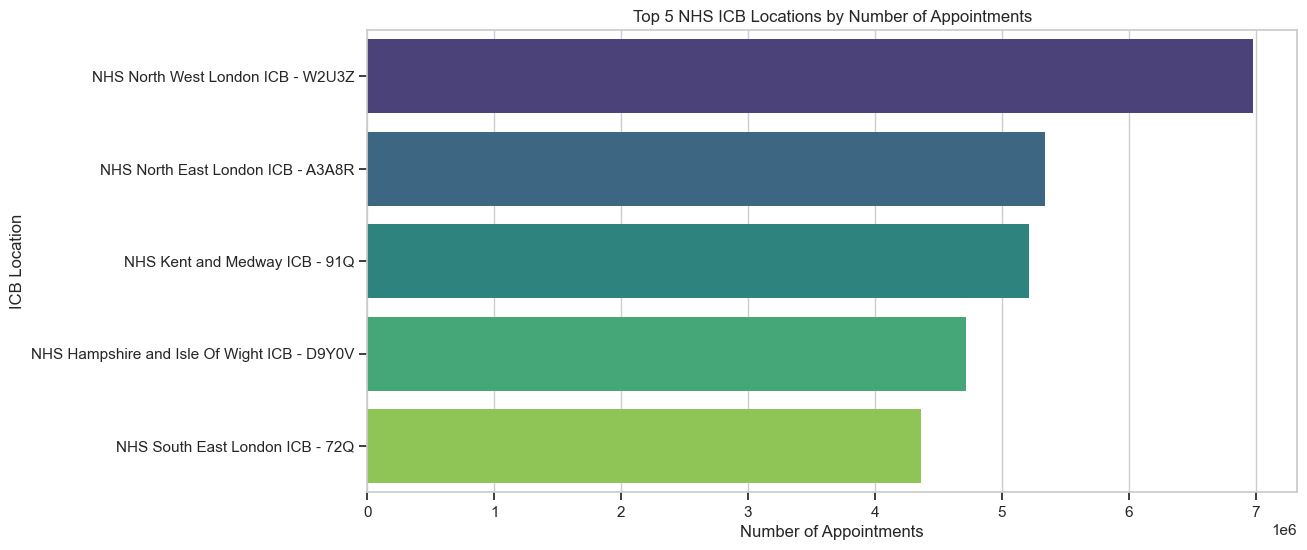

In [179]:
#visualize the result:
sns.barplot(x='count_of_appointments', y='sub_icb_location_name', data=top_5_locations, palette='viridis')
plt.title('Top 5 NHS ICB Locations by Number of Appointments')
plt.xlabel('Number of Appointments')
plt.ylabel('ICB Location')
plt.savefig('top 5 NHS ICB Locations.png')
plt.show()

#Top 5 ICB Locations by Appointment Volume
This chart highlights the NHS locations with the highest number of appointments. These areas may face the greatest pressure and should be prioritized in any service expansion planning. Notably, North West and North East London lead significantly in appointment volume.

In [180]:
# Determine the number of service settings.
unique_settings = nc['service_setting'].unique().tolist()
print('The number of Service Setting is:',nc['service_setting'].nunique())
print('The Service Setting names are', unique_settings)

The number of Service Setting is: 5
The Service Setting names are ['Primary Care Network', 'Other', 'General Practice', 'Unmapped', 'Extended Access Provision']


In [181]:
# Determine the number of context types.
unique_context= nc['context_type'].unique().tolist()
print('The number of context_type is',nc['context_type'].nunique())
print('The Service Context Types are', unique_context)


The number of context_type is 3
The Service Context Types are ['Care Related Encounter', 'Unmapped', 'Inconsistent Mapping']


In [182]:
# Determine the number of national categories.
unique_category= nc['national_category'].unique().tolist()
print('The number of national_category is',nc['national_category'].nunique())
print('The NationalCategories are',unique_category)

The number of national_category is 18
The NationalCategories are ['Patient contact during Care Home Round', 'Planned Clinics', 'Home Visit', 'General Consultation Acute', 'Structured Medication Review', 'Care Home Visit', 'Unmapped', 'Clinical Triage', 'Planned Clinical Procedure', 'Inconsistent Mapping', 'Care Home Needs Assessment & Personalised Care and Support Planning', 'General Consultation Routine', 'Service provided by organisation external to the practice', 'Unplanned Clinical Activity', 'Social Prescribing Service', 'Non-contractual chargeable work', 'Group Consultation and Group Education', 'Walk-in']


In [183]:
# Determine the number of appointment statuses.
unique_statuses= ar['appointment_status'].unique().tolist()
print('The number of appointment statuses is', ar['appointment_status'].nunique())
print('The Appointement status are :',unique_statuses)

The number of appointment statuses is 3
The Appointement status are : ['Attended', 'DNA', 'Unknown']


#Additional questions:Note: The below questions were chosen based on patterns observed during data exploration and NHS priorities such as care accessibility and staffing visibility.


In [184]:
#Determine the number of the  Health professional 
health_list= ar['hcp_type'].unique().tolist()
print('The number of the  Health professional are', ar['hcp_type'].nunique())
print('the name of the  Health professional :',health_list)

The number of the  Health professional are 3
the name of the  Health professional : ['GP', 'Other Practice staff', 'Unknown']


# Initial exploration revealed:
# - 106 NHS locations, with 5 having the highest appointment volumes
# - 5 service settings, 3 context types, and 18 national categories
# - 3 appointment statuses and 3 healthcare professional types


### Appointment Analysis Overview

This section addresses key questions from the NHS data, including:

- The overall date range of appointment records
- The most popular service setting in NHS North West London (Jan–June 2022)
- The month with the highest number of appointments
- Monthly appointment volumes across the dataset
- Distribution of appointment statuses (Attended, DNA, Unknown)
- Non-attendance rates (DNA + Unknown) by ICB location
- Average waiting time across all services (5.3 days)


In [185]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head(5)

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [186]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head(5)

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [187]:
# Change the date format of ad['appointment_date'].
ad['appointment_date']=pd.to_datetime(ad['appointment_date'])

# View the DataFrame.
ad['appointment_date'].head(3)

0   2021-12-01
1   2021-12-01
2   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [188]:
# Change the format of ar['appointment_date'] to datetime.
nc['appointment_date']=pd.to_datetime(nc['appointment_date'])
# View the DataFrame.
ad['appointment_date'].head(5)

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [189]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
first_date = ad['appointment_date'].min()
last_date = ad['appointment_date'].max()
# Display the result
print(f"The appointments are scheduled between {first_date.date()} and {last_date.date()}.")

The appointments are scheduled between 2021-12-01 and 2022-06-30.


In [190]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
first_date = nc['appointment_date'].min()
last_date = nc['appointment_date'].max()

# Display the result
print(f"The appointments are scheduled between {first_date.date()} and {last_date.date()}.")

The appointments are scheduled between 2021-08-01 and 2022-06-30.


In [191]:
# For each of these service settings, determine the number of records available for the period and the location. 
filtered_df = nc[
    (nc['sub_icb_location_name'].str.contains('NHS North West London ICB', case=False, na=False)) &
    (nc['appointment_date'] >= '2022-01-01') &
    (nc['appointment_date'] <= '2022-06-01')
]

most_common_service = filtered_df.groupby('service_setting').size().sort_values(ascending=False)

# View the output.
print(most_common_service)



service_setting
General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
dtype: int64


In [192]:
appointment_number=nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
appointment_number=appointment_number.sort_values(by='count_of_appointments',ascending=False)
appointment_number['count_of_appointments'] = appointment_number['count_of_appointments'].apply(lambda x: f"{x:,}")
print(appointment_number.head(5))

  appointment_month count_of_appointments
3           2021-11            30,405,070
2           2021-10            30,303,834
7           2022-03            29,595,038
1           2021-09            28,522,501
9           2022-05            27,495,508


In [193]:
# Total number of records per month
total_records = nc.groupby('appointment_month').size().rename('Total').reset_index()
# Sort by total (descending) and show the result
total_records_sorted = total_records.sort_values(by='Total', ascending=False)
print(total_records_sorted)



   appointment_month  Total
7            2022-03  82822
3            2021-11  77652
9            2022-05  77425
1            2021-09  74922
10           2022-06  74168
2            2021-10  74078
4            2021-12  72651
5            2022-01  71896
6            2022-02  71769
8            2022-04  70012
0            2021-08  69999


###### 📝 Data Note
No appointments were recorded for July in the dataset, as confirmed by checking for `appointment_date` values where the month equals 7.


In [194]:
#Distribution of appointment statuses?
status_list = ar['appointment_status'].value_counts()
total = status_list.sum()
appointment_status_percent = (status_list / total) * 100
appointment_status_percent_formatted = appointment_status_percent.round(2).astype(str) + '%'
print(appointment_status_percent_formatted)

appointment_status
Attended     38.9%
Unknown     33.73%
DNA         27.37%
Name: count, dtype: object


In [195]:
# Calculate Non-Attendance Percentage (DNA + Unknown) by ICB Location
#Create a clean lookup for location names (one name per code)
loc = ad[['icb_ons_code', 'sub_icb_location_name']].drop_duplicates(subset='icb_ons_code')
#Merge location info into appointment data
app_st = pd.merge(ar,loc,how='left',on='icb_ons_code')
#Total appointments per ICB
total_counts = ar.groupby('icb_ons_code')['count_of_appointments'].sum().reset_index()
total_counts = pd.merge(total_counts, loc, how='left', on='icb_ons_code')  # Add location names
#otal DNA + Unknown per ICB
filtered = app_st[app_st['appointment_status'].isin(['DNA', 'Unknown'])]
non_attended_counts = filtered.groupby('icb_ons_code')['count_of_appointments'].sum().reset_index()
non_attended_counts.rename(columns={'count_of_appointments': 'dna_unknown_total'}, inplace=True)
# Step 4: Merge and calculate percentage
final = pd.merge(total_counts, non_attended_counts, how='left', on='icb_ons_code')
final['dna_unknown_total'] = final['dna_unknown_total'].fillna(0)
final['non_attendance_percentage'] = (final['dna_unknown_total'] / final['count_of_appointments']) * 100
# Step 5: Format for display
final['non_attendance_pct_label'] = final['non_attendance_percentage'].round(1).astype(str) + '%'
final[['sub_icb_location_name', 'non_attendance_pct_label']].drop_duplicates().head(10)
# Step 6: Sort and display results (top 10)
final = final.sort_values('non_attendance_percentage', ascending=False)
final.columns
final = final.drop(['icb_ons_code', 'count_of_appointments', 'dna_unknown_total', 'non_attendance_percentage'], axis=1, errors='ignore')
final = final.rename(columns={
    'sub_icb_location_name': 'Location',
    'non_attendance_pct_label': 'Non-Attendance Rate'
})
final.head(5)

,Location,Non-Attendance Rate
36,NHS Greater Manchester ICB - 00T,11.1%
41,NHS Black Country ICB - D2P2L,10.6%
15,NHS South East London ICB - 72Q,10.3%
34,NHS Birmingham and Solihull ICB - 15E,10.0%
14,NHS North East London ICB - A3A8R,9.9%


In [196]:
# Select relevant columns from both datasets
appointment_time = ar[['icb_ons_code', 'time_between_book_and_appointment', 'appointment_mode', 'appointment_status', 'count_of_appointments']]
appointment_location = nc[['icb_ons_code', 'sub_icb_location_name', 'service_setting', 'context_type', 'national_category']]
#Drop duplicate location entries to avoid merging duplication
appointment_location.drop_duplicates(subset='icb_ons_code', inplace=True)
# Merge datasets on 'icb_ons_code' to combine time and location info
appointment_list = pd.merge(appointment_time, appointment_location, how='left', on='icb_ons_code')
#Create a pivot table of appointment counts by location and waiting time band
avg_time = appointment_list.pivot_table(index='sub_icb_location_name',
                                        columns='time_between_book_and_appointment',
                                        values='count_of_appointments',
                                        aggfunc='sum')
# Clean up column names and remove poor-quality entries
avg_time.columns.name = None
avg_time.drop(columns='Unknown / Data Quality', inplace=True, errors='ignore')
#Sort by 'More than 28 Days' to check for longest wait times (optional step)
avg_time = avg_time.sort_values(by='More than 28 Days', ascending=False)
#Convert to integers and fill any NaNs with 0
avg_time = avg_time.fillna(0).round(0).astype(int)
#  Add any missing wait time columns (if not present in this dataset)
for col in ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days']:
    if col not in avg_time.columns:
        avg_time[col] = 0
#Calculate total appointments per location
avg_time['total_appointments'] = (
    avg_time['Same Day'] +
    avg_time['1 Day'] +
    avg_time['2 to 7 Days'] +
    avg_time['8  to 14 Days'] +
    avg_time['15  to 21 Days'] +
    avg_time['22  to 28 Days'] +
    avg_time['More than 28 Days']
)

#Estimate average waiting time using weighted midpoints for each category
avg_time['estimated_average_waiting_time'] = (
    (avg_time['Same Day'] * 0) +
    (avg_time['1 Day'] * 1) +
    (avg_time['2 to 7 Days'] * 4.5) +
    (avg_time['8  to 14 Days'] * 11) +
    (avg_time['15  to 21 Days'] * 18) +
    (avg_time['22  to 28 Days'] * 25) +
    (avg_time['More than 28 Days'] * 35)
) / avg_time['total_appointments']

#Round to 1 decimal place and sort locations by average wait time
avg_time['estimated_average_waiting_time'] = avg_time['estimated_average_waiting_time'].round(1)
avg_time = avg_time.sort_values(by='estimated_average_waiting_time', ascending=False)

#Print average waiting time across all locations
print("Estimated NHS-wide average waiting time:", avg_time['estimated_average_waiting_time'].mean().round(1), "days")


Estimated NHS-wide average waiting time: 5.3 days


### Summary:
# - Appointment records span different timeframes across datasets (Aug–Dec 2021 to Jun 2022)
# - NHS North West London ICB has the highest GP appointment volume among 5 service settings
# - Peak months include Oct–Nov 2021 and Mar–May 2022
# - Only 38% of appointments were attended
# - Non-attendance (DNA + Unknown) exceeds 10% in several key ICBs
# - Average waiting time is 5.3 days


### 📊 Monthly and Seasonal Trends in NHS Appointments
This section explores patterns in NHS appointments by month, season, region, and professional type. It includes:

- Converting the `appointment_month` to string format for consistent plotting
- Seasonal appointment trends by service setting (summer, autumn, winter, spring)
- Line chart of appointment volumes by date and region
- Regional distribution of healthcare professional types


In [197]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month']=nc['appointment_month'].astype(str)

In [199]:
# Aggregate on a monthly level and determine the sum of records per month.
nc['appointment_month']=nc['appointment_month'].astype(str)
nc_ss=nc.groupby(['appointment_month','service_setting', 'context_type', 'national_category'])['count_of_appointments']\
 .sum()\
 .reset_index()\
 .copy()

# View the output.
nc_ss


,appointment_month,service_setting,context_type,national_category,count_of_appointments
0,2021-08,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care and Support Planning,229
1,2021-08,Extended Access Provision,Care Related Encounter,Care Home Visit,624
2,2021-08,Extended Access Provision,Care Related Encounter,Clinical Triage,29480
3,2021-08,Extended Access Provision,Care Related Encounter,General Consultation Acute,28825
4,2021-08,Extended Access Provision,Care Related Encounter,General Consultation Routine,32657
...,...,...,...,...,...
753,2022-06,Primary Care Network,Care Related Encounter,Structured Medication Review,56142
754,2022-06,Primary Care Network,Care Related Encounter,Unplanned Clinical Activity,7316
755,2022-06,Primary Care Network,Care Related Encounter,Walk-in,244
756,2022-06,Primary Care Network,Inconsistent Mapping,Inconsistent Mapping,85848


**Service settings:**

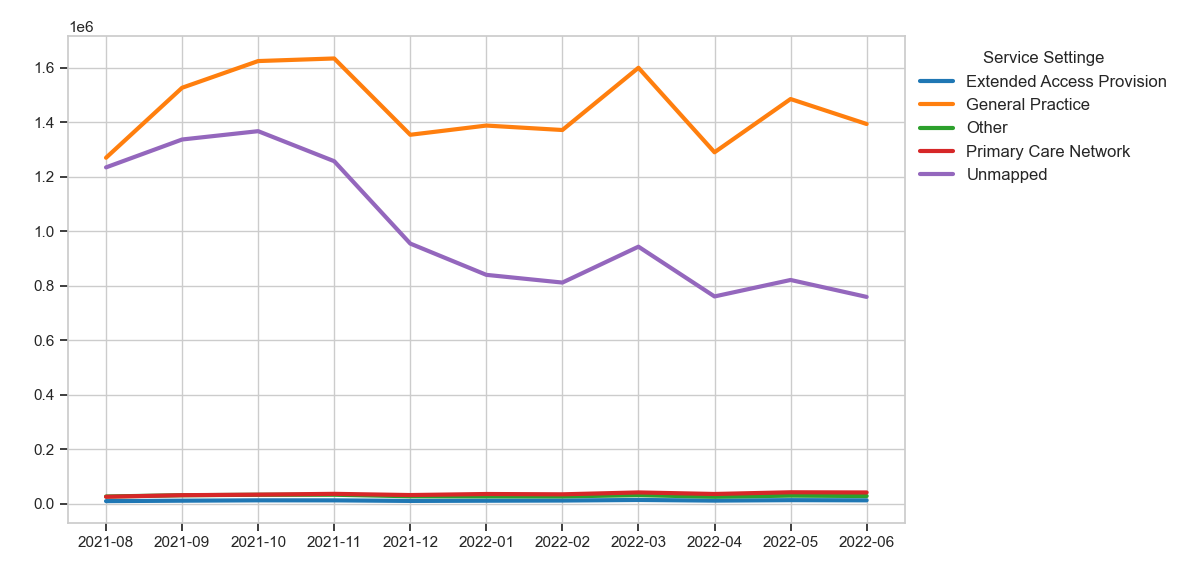

In [200]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(data=nc_ss, x='appointment_month', y='count_of_appointments', hue='service_setting', 
             linewidth=3, errorbar=None)

# Adding title and labels
plt.title('Number of Appointments per Month by Service Setting', fontsize=18, color='white')
plt.xlabel('Month', fontsize=14, color='white')
plt.ylabel('Number of Appointments', fontsize=14, color='white')
# Customizing ticks
# Adjusting the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Service Settinge', fontsize=12)
plt.tight_layout()
#Save the chart
plt.savefig('Appointments per Month by Service Setting.png')
# Display the plot
plt.show()

**Context types:**


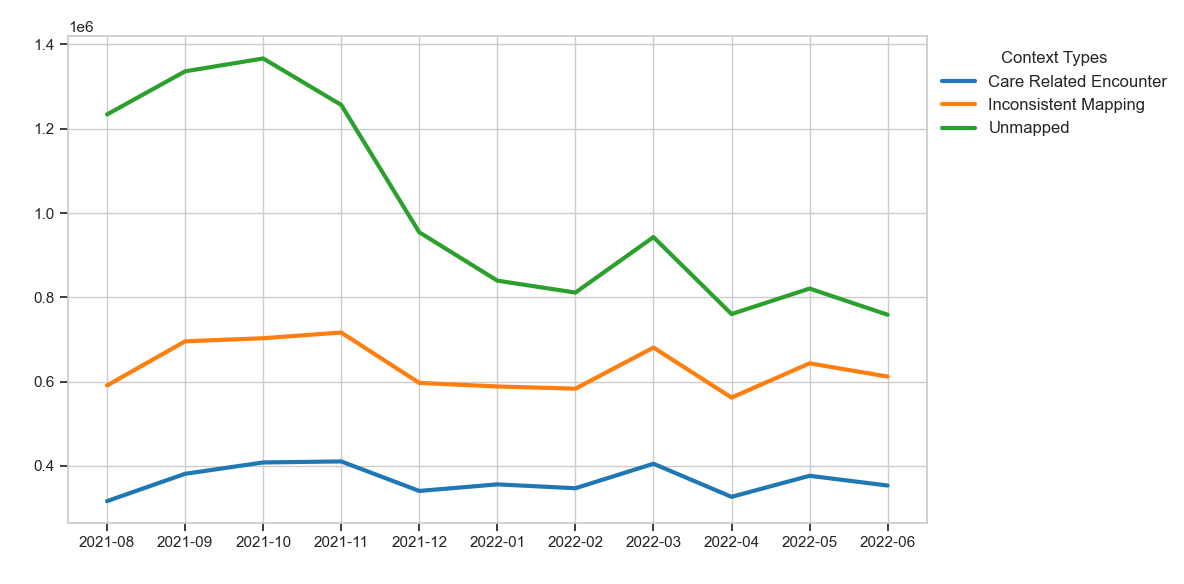

In [201]:
# Create the improved line plot
sns.lineplot(data=nc_ss, x='appointment_month', y='count_of_appointments', hue='context_type', 
             linewidth=3, errorbar=None)

# Adding title and labels
plt.title('Number of Appointments per Month by Context Types', fontsize=18, color='white')
plt.xlabel('Month', fontsize=14, color='white')
plt.ylabel('Number of Appointments', fontsize=14, color='white')

# Adjusting the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Context Types', fontsize=12)
plt.tight_layout()
# Save the chart
plt.savefig('Appointments per Month by Context Type.png')
# Display the plot
plt.show()

### 📝 Data Quality Observation

- The `context_type` column contains values such as "Unmapped" and "Inconsistent Mapping," which suggest potential data quality or classification issues.
- These values may represent missing or incorrectly categorized appointment data.
- Understanding and addressing these anomalies could enhance data reliability and improve decision-making.


# National Category

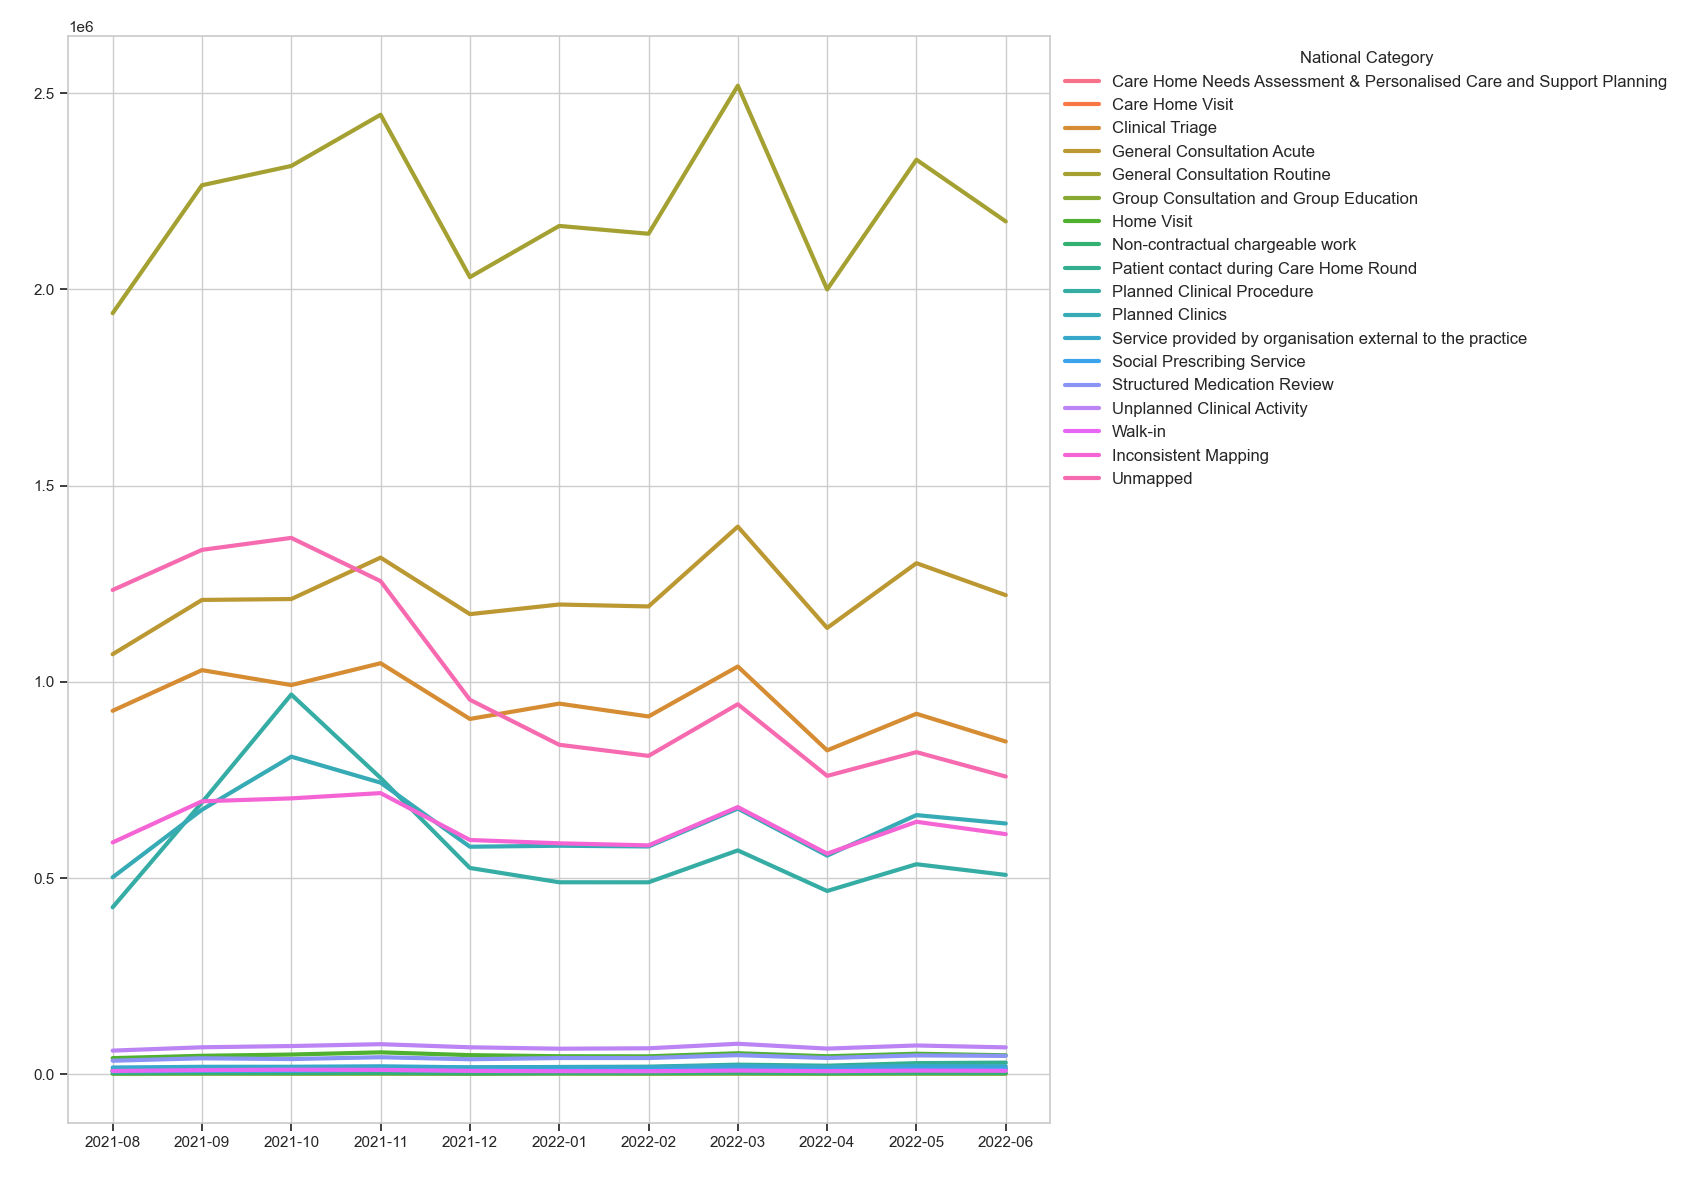

In [202]:
# Create the line plot
plt.figure(figsize=(17,12))
sns.lineplot(data=nc_ss, x='appointment_month', y='count_of_appointments', hue='national_category', 
             linewidth=3, errorbar=None)
# Adding title and labels
plt.title('Number of Appointments per Month by National Category', fontsize=18, color='white')
plt.xlabel('Month', fontsize=14, color='white')
plt.ylabel('Number of Appointments', fontsize=14, color='white')
# Adjusting the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='National Category', fontsize=12)
plt.tight_layout()
# Save the chart
plt.savefig('Appointments per Month by National Category.png')
# Display the plot
plt.show()

In [203]:
#Create a separate dataset
# Step 1: Convert appointment_date to datetime (if not already done)
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Step 2: Create 'appointment_month' in string format for plotting
nc['appointment_month'] = nc['appointment_date'].dt.to_period('M').astype(str)

# Step 3: Group by appointment_month and service_setting
nc_ss_day = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'] \
              .sum() \
              .reset_index() \
              .copy()

# Step 4: Re-create 'appointment_month' as datetime for time operations
nc_ss_day['month_dt'] = pd.to_datetime(nc_ss_day['appointment_month'])

# Step 5: Extract numeric month and year
nc_ss_day['month_num'] = nc_ss_day['month_dt'].dt.month
nc_ss_day['year'] = nc_ss_day['month_dt'].dt.year

# Step 6: Restore string format column for plotting
# (your plot_season function uses this for x-axis)
nc_ss_day['appointment_month'] = nc_ss_day['month_dt'].dt.to_period('M').astype(str)

# ✅ Now the DataFrame 'nc_ss_day' is ready and compatible with your plot_season function
# You can filter seasons like this:

# Summer: June (6), July (7), August (8)
summer_season = nc_ss_day[nc_ss_day['month_num'].isin([6, 7, 8])]

# Autumn: September (9), October (10), November (11)
autumn_season = nc_ss_day[nc_ss_day['month_num'].isin([9, 10, 11])]

# Winter: December (12), January (1), February (2)
winter_season = nc_ss_day[nc_ss_day['month_num'].isin([12, 1, 2])]

# Spring: March (3), April (4), May (5)
spring_season = nc_ss_day[nc_ss_day['month_num'].isin([3, 4, 5])]


**Summer:**


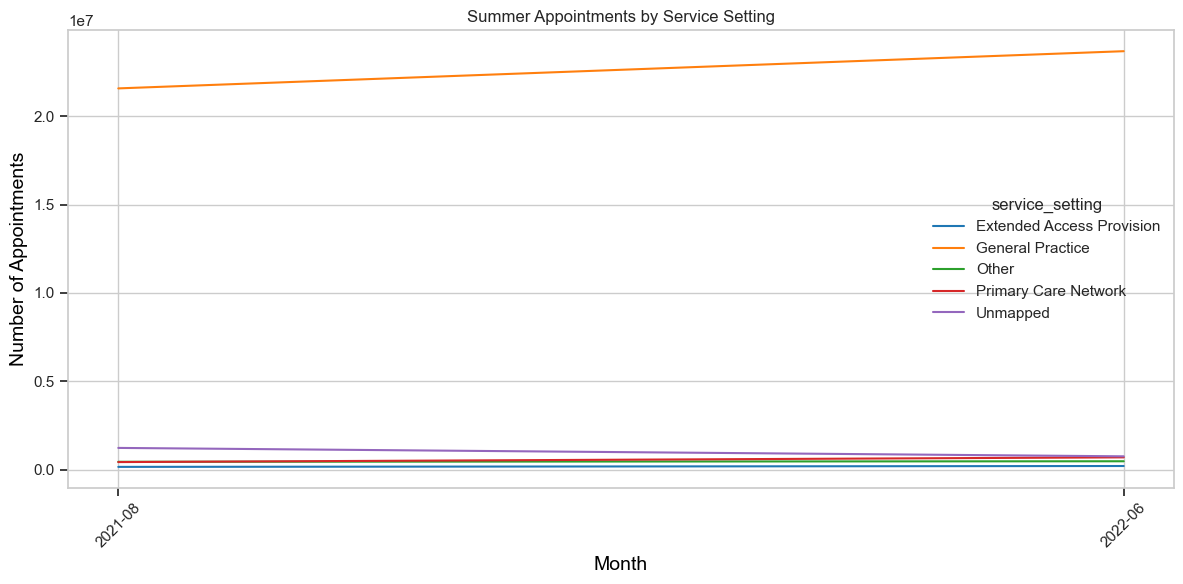

In [204]:
# Visualise the subset using a lineplot.)
sns.lineplot(data=summer_season, x='appointment_month', y='count_of_appointments', hue='service_setting')
plt.title('Summer Appointments by Service Setting')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Number of Appointments', fontsize=14, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Summer Appointments.png')
plt.show()


**Autumn:**

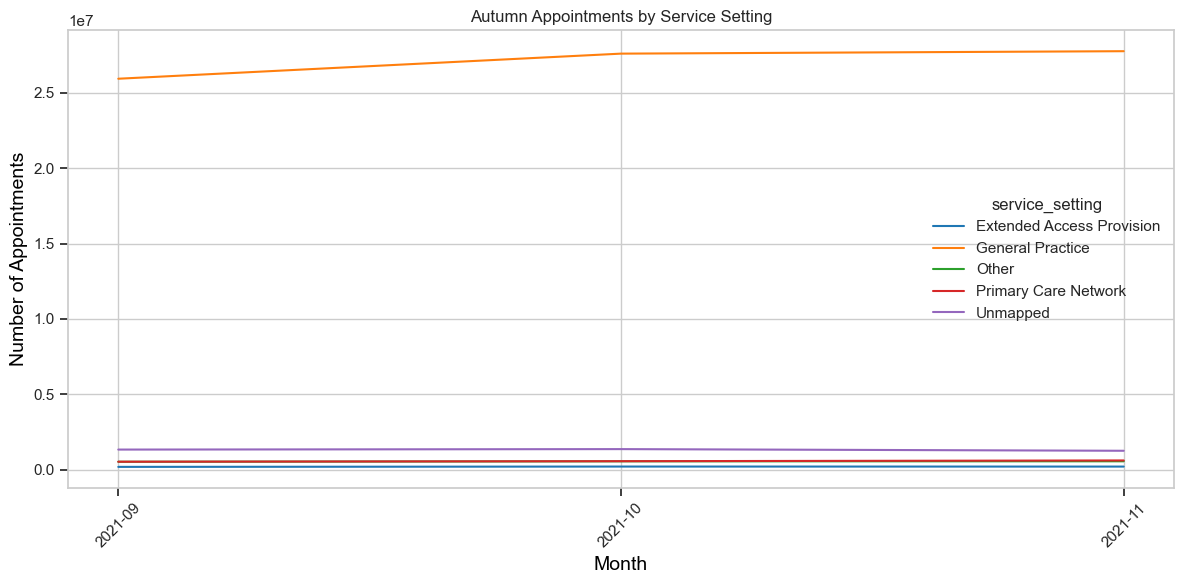

In [205]:
# Visualise the subset using a lineplot.
sns.lineplot(data=autumn_season, x='appointment_month', y='count_of_appointments', hue='service_setting')
plt.title('Autumn Appointments by Service Setting')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Number of Appointments', fontsize=14, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Autumn Appointments.png')
plt.show()

**Winter:**

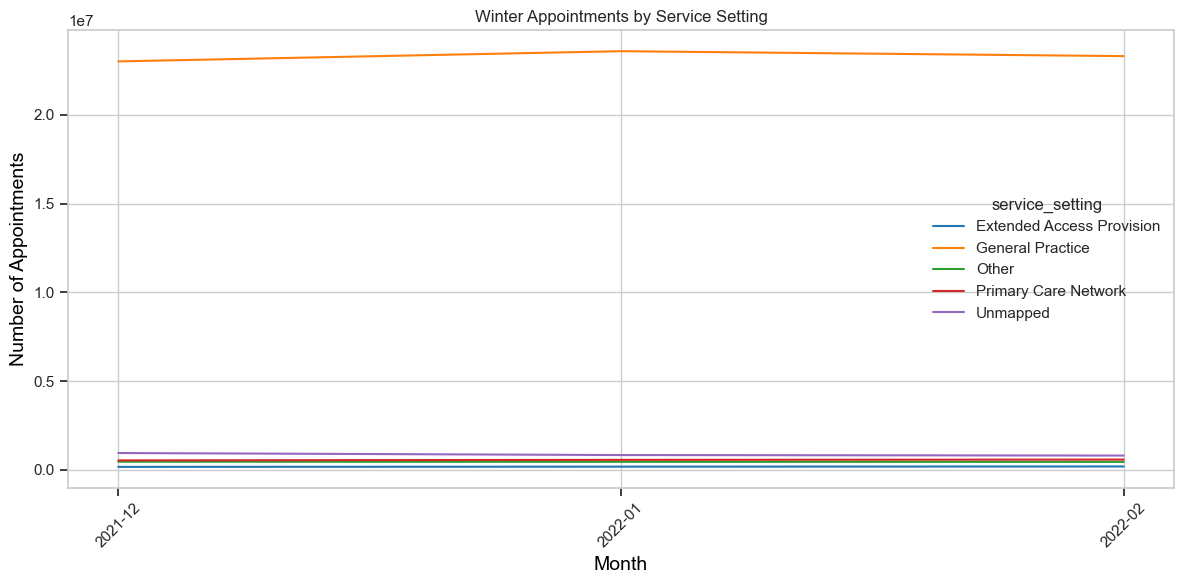

In [206]:
# Visualise the subset using a lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(data=winter_season, x='appointment_month', y='count_of_appointments', hue='service_setting')
plt.title('Winter Appointments by Service Setting')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Number of Appointments', fontsize=14, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Winter Appointments.png')
plt.show()

**Spring:**

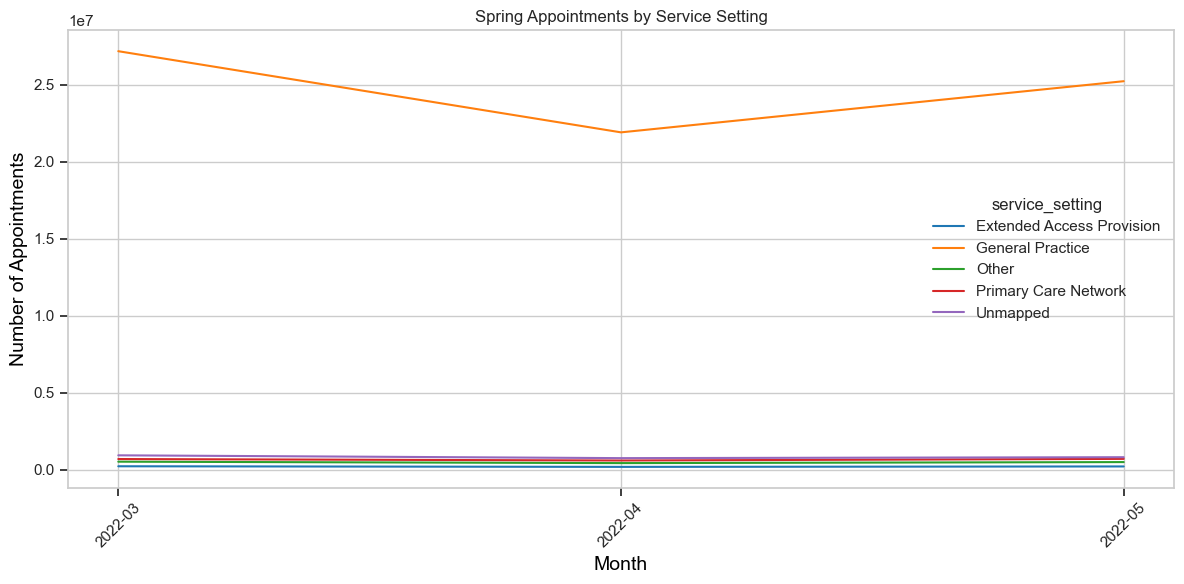

In [207]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=spring_season , x='appointment_month', y='count_of_appointments', hue='service_setting')
plt.title('Spring Appointments by Service Setting')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Number of Appointments', fontsize=14, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Spring Appointments.png')
plt.show()

In [208]:
#Create a Line chart  by  date, location, and  the sum of the appointment count 

#Stepp 1 : create the sub dataset 
ad['region_ons_code'].unique()
region_map = {
    'E40000003': 'South East',
    'E40000005': 'South West',
    'E40000006': 'London',
    'E40000007': 'East of England',
    'E40000010': 'Midlands',
    'E40000011': 'North West',
    'E40000012': 'North East and Yorkshire'
}
ad['region_name'] = ad['region_ons_code'].map(region_map)
ad['region_name'].isnull().sum()
location_region = ad.groupby(['region_name', 'appointment_date'])['count_of_appointments'].sum().reset_index().copy()
location_region['appointment_month'] = location_region['appointment_date'].dt.to_period('M').dt.to_timestamp()


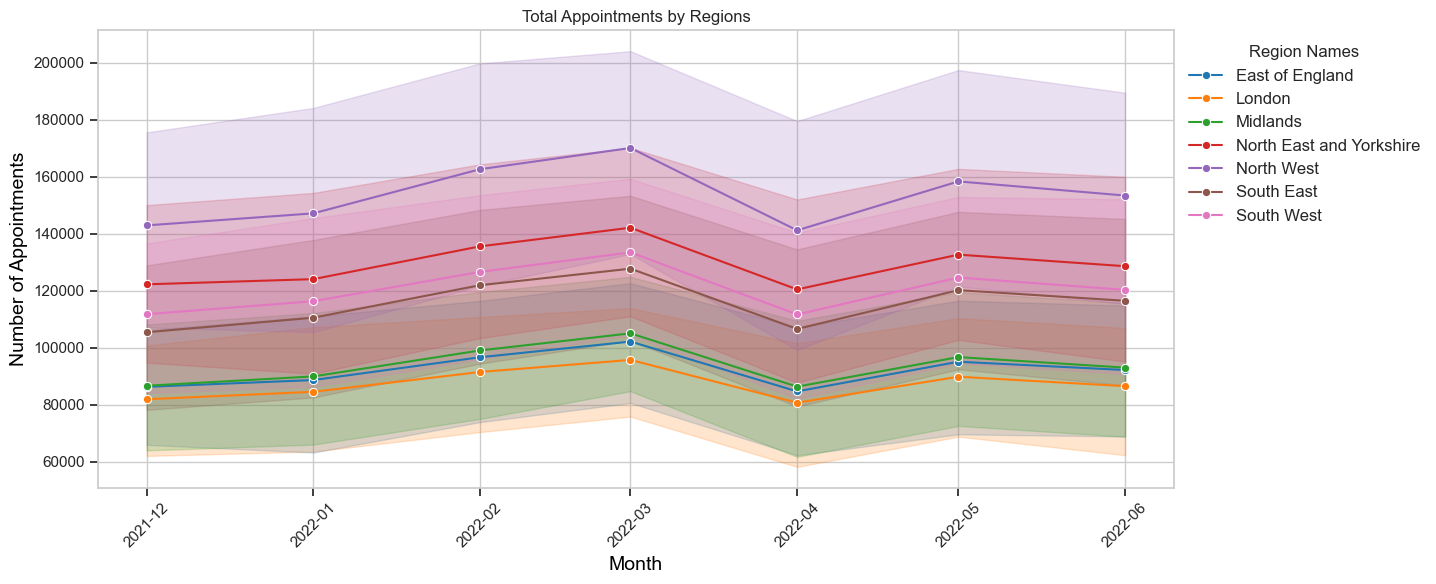

In [209]:
#Create a Line chart 
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=location_region,
    x='appointment_month',
    y='count_of_appointments',
    hue='region_name',
    marker='o'  # works now!
)
plt.title('Total Appointments by Regions')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Number of Appointments', fontsize=14, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region Names', fontsize=12)
plt.savefig('Total Appointments by Regions')
plt.show()


In [210]:
# Creating a dataset to identify professional types by Region.
ad['icb_ons_code']=ad['icb_ons_code'].drop_duplicates()
location=ad[['region_name','icb_ons_code','region_ons_code']]
pr=ar[['icb_ons_code','hcp_type','appointment_month','appointment_status','count_of_appointments']]
hcp_locations=pd.merge(pr,location,how='left',on='icb_ons_code')
hcp_locations=hcp_locations[hcp_locations['appointment_status']=='Attended']
pr_hcp = hcp_locations.groupby(['hcp_type', 'region_name'])['count_of_appointments'].sum().reset_index().copy()
pr_hcp

,hcp_type,region_name,count_of_appointments
0,GP,East of England,39198787
1,GP,London,36990052
2,GP,Midlands,43573068
3,GP,North East and Yorkshire,51600250
4,GP,North West,68909696
5,GP,South East,61514249
6,GP,South West,56060903
7,Other Practice staff,East of England,37144992
8,Other Practice staff,London,35606455
9,Other Practice staff,Midlands,33548807


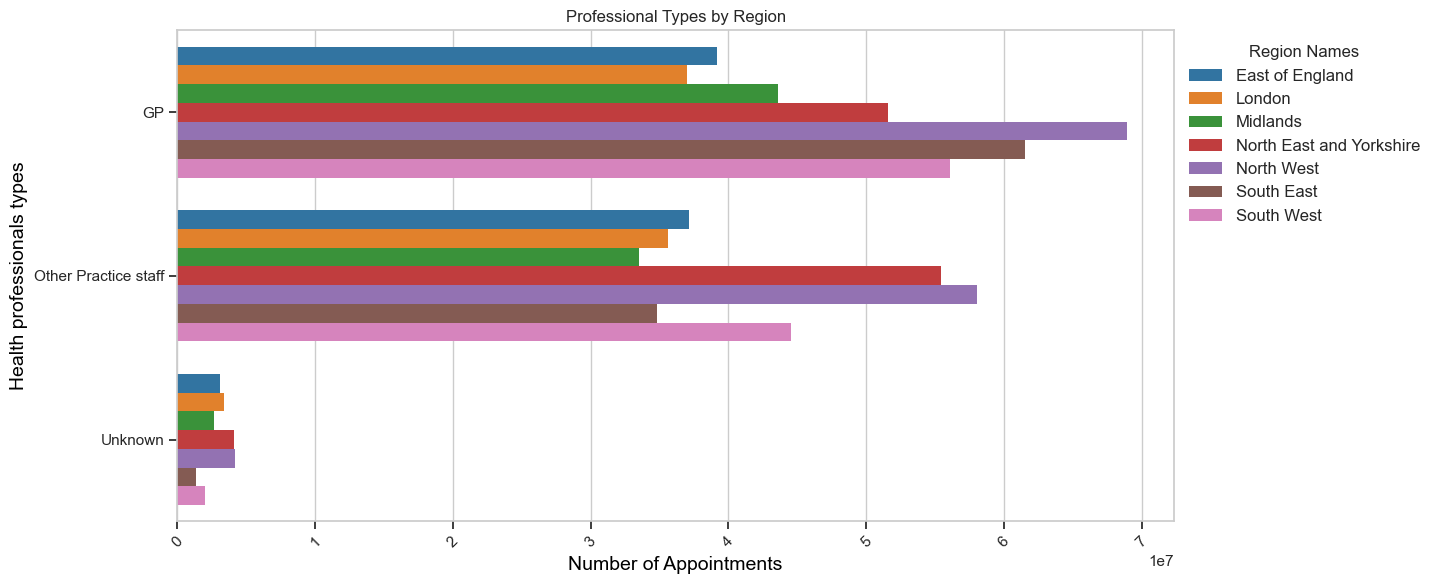

In [211]:
# Create a bar chart to show the utilization of health professionals 
plt.figure(figsize=(12, 6))
sns.barplot(y='hcp_type', x='count_of_appointments', hue='region_name', data=pr_hcp)
plt.title('Professional Types by Region')
plt.xlabel('Number of Appointments', fontsize=14, color='black')
plt.ylabel('Health professionals types', fontsize=14, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Region Names', fontsize=12)
plt.savefig('Location.png')
plt.show()



# Summary of Visual Analysis:
# - 'Unmapped' and 'Inconsistent Mapping' context types are the most recorded.
# - General Consultation (Routine and Acute) consistently dominate national categories in appointment volumes
# - General Practice is the highest booked service setting across all seasons, especially in autumn and winter
# - Regional variation in professional types shows GPs are the most booked in almost every area
# - Appointment volumes vary by season but remain consistently high in spring and autumn
# - Total appointments show steady patterns across regions, with some fluctuations in March and May 2022


### Analyzing UK Healthcare-Related Hashtags on Twitter


In [212]:
# Load the data set.
tweets=pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [213]:
# Explore the metadata and data set.
print(tweets.info())
print(tweets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None
           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std

### Exploring the Tweets Dataset

The `tweets` dataset contains 1174 rows and 10 columns. It includes metadata on tweets posted by NHS accounts on the social media platform X (formerly Twitter). The dataset captures various features such as the full tweet text, hashtags, retweet and favorite counts, and language used.

**Key observations:**
- All columns are complete except `tweet_entities_hashtags`, which has 167 missing values.
- Most tweets have low engagement:
  - Median retweets: 1
  - Median favorites: 0
  - Max retweets: 303
- The dataset includes both boolean fields (e.g., `tweet_retweeted`) and text fields (e.g., `tweet_full_text`).


# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.

While investigating the `tweet_retweet_count` and `tweet_favorite_count` columns provides insight into which tweets generated the most engagement, focusing only on those metrics would be limiting.

Other fields such as `tweet_entities_hashtags` and `tweet_full_text` are equally important, as they can help us understand **what type of content drives engagement**. Hashtags, for example, are key to visibility and campaign tracking, while the full tweet text provides context on messaging tone and themes.
Therefore, a more holistic approach — combining quantitative engagement metrics with content and hashtag analysis — would yield a deeper understanding of NHS engagement on X.


In [214]:
# Create a new DataFrame containing only the text.
tweets_text=tweets[['tweet_full_text','tweet_entities','tweet_entities_hashtags','tweet_metadata','tweet_lang']]
# View the DataFrame.
tweets_text

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_lang
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",en
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",en
...,...,...,...,...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",en
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",en
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices': [209, 213]}, {'text': 'healthcare', 'indices': [235, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': '...","#webinar, #ESG, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",en
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYym

In [215]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())
            
# Convert the series to a DataFrame in preparation for visualisation.
lhashtags_df = pd.DataFrame({'hashtag': tags}).reset_index()



In [216]:
# Display the first 30 records.
lhashtags_df.head(30)


,index,hashtag
0,0,#healthcare
1,1,#premisehealth
2,2,#hiring
3,3,#healthcare
4,4,🚨#new:🚨
5,5,look!\n\n#blogs
6,6,#digitaltransformation
7,7,#cybersecurity
8,8,#accounting
9,9,#finance


In [217]:
# Rename the columns.
lhashtags_df.columns=['index', 'hashtag']

# Count the occurrences of each hashtag
hashtags_count = lhashtags_df['hashtag'].value_counts().reset_index().copy()

# Rename the columns to 'word' and 'count'
hashtags_count.columns = ['word', 'count']

hashtags_count


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [218]:
# Fix the count datatype.
#The count type is Int64
# View the result.
hashtags_count.dtypes


word     object
count     int64
dtype: object

In [219]:
# Display records where the count is larger than 10.
hashtags_10= hashtags_count[hashtags_count['count']>10].reset_index().copy()
hashtags_10

,index,word,count
0,0,#healthcare,716
1,1,#health,80
2,2,#medicine,41
3,3,#ai,40
4,4,#job,38
5,5,#medical,35
6,6,#strategy,30
7,7,#pharmaceutical,28
8,8,#digitalhealth,25
9,9,#pharma,25


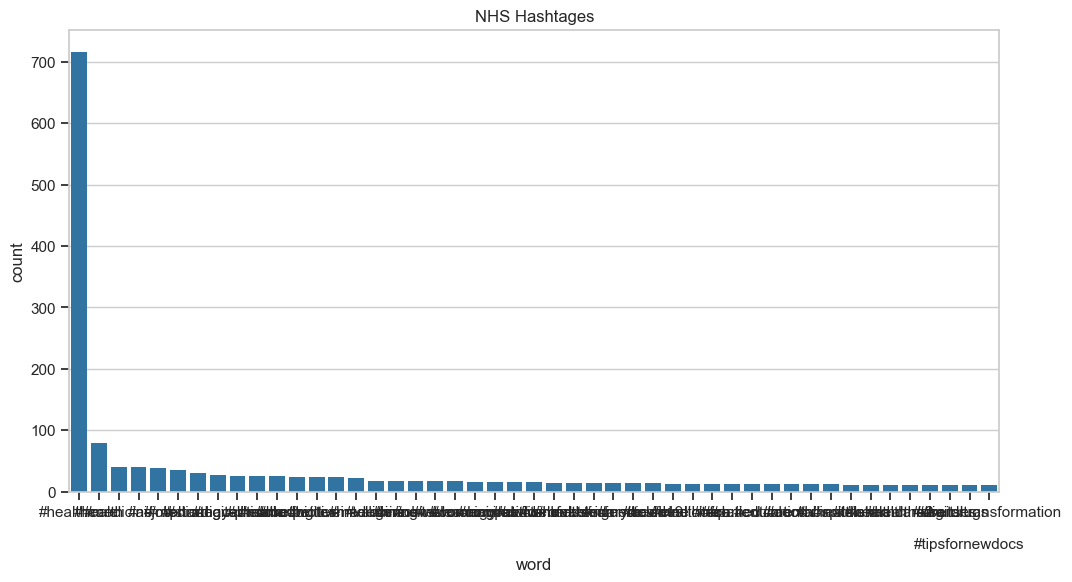

In [220]:
#Two charts were created to explore NHS hashtag usage on X. The first shows all hashtags used more than 10 times, highlighting diversity but also low-frequency tags. The second focuses on the top 10 most-used hashtags, revealing the main themes promoted by the NHS.
sns.barplot(x='word',y='count',data=hashtags_10).set_title ('NHS Hashtages')
plt.savefig('NHS Hashtages.png')

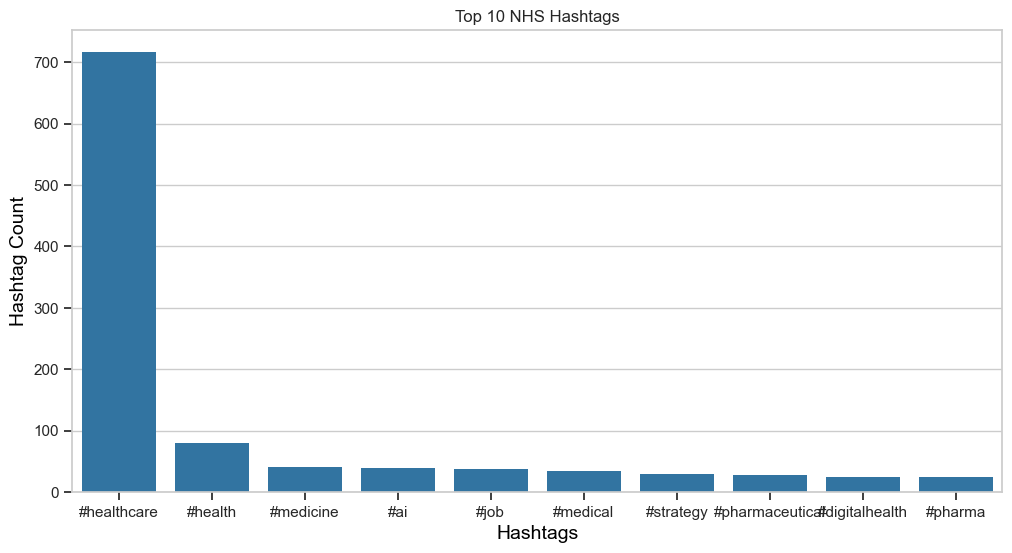

In [221]:
# Create the plot.
# Create a Seaborn barplot displaying records with a count larger than 10.
sns.barplot(x='word',y='count',data=hashtags_10.head(10)).set_title ('Top 10 NHS Hashtags')
plt.xlabel('Hashtags', fontsize=14, color='black')
plt.ylabel('Hashtag Count', fontsize=14, color='black')
plt.savefig('Top_10_NHS_Hashtags.png')
plt.show()

In [222]:
# Extracting Hashtags and Their Retweet Counts from Tweets
hashtag_retweets = []
# Iterate through each tweet row
for i, row in tweets.iterrows():
    text = row['tweet_full_text']
    retweet_count = row['tweet_retweet_count']  
    # Split tweet text into individual words
    words = text.split()    
    # Identify hashtags and pair them with retweet count
    for word in words:
        if '#' in word:
            hashtag_retweets.append({
                'hashtag': word.lower(),             # Convert to lowercase for consistency
                'retweet_count': retweet_count       # Store retweet count with the hashtag
            })
# Convert list of dictionaries to DataFrame
retweets_counts = pd.DataFrame(hashtag_retweets)

# Sort hashtags by retweet count in descending order
retweets_counts = retweets_counts.sort_values(by='retweet_count', ascending=False)

# Display the DataFrame
retweets_counts


,hashtag,retweet_count
4225,#tipsfornewdocs,169
4229,#medical,169
4226,#meded,169
4227,#medtwitter,169
4228,#medicine,169
...,...,...
1990,#wallstreet,0
2005,#spanishtranslation,0
2006,#professionalservices,0
2007,#healthcare,0


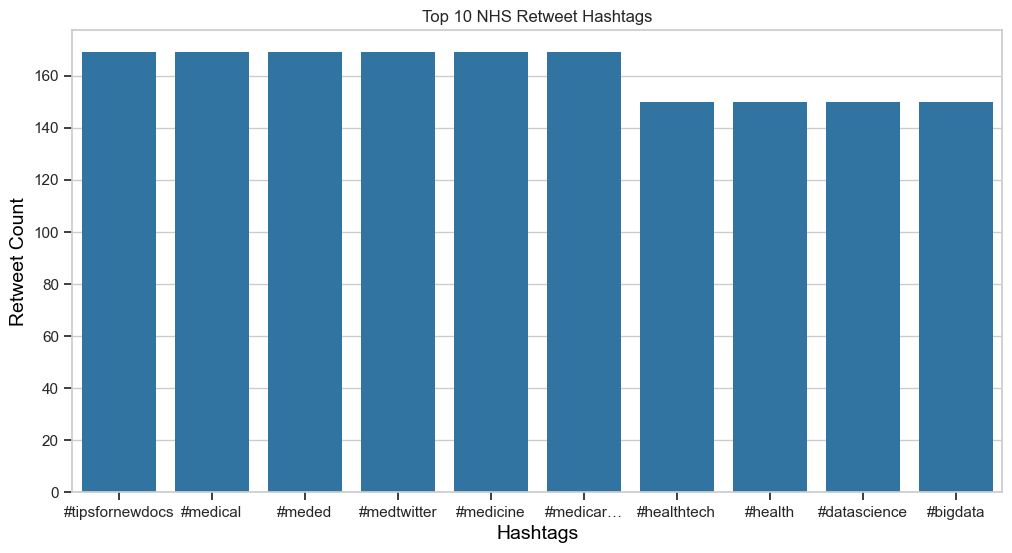

In [223]:
#This bar chart highlights the top 10 most retweeted hashtags from NHS tweets. Hashtags such as #tipsfornewdocs, #medtwitter, and #healthtech show strong public engagement, suggesting that content related to professional development, medical education, and healthcare technology is highly shareable. These hashtags can help guide future communication strategies.
sns.barplot(x='hashtag',y='retweet_count',data=retweets_counts.head(10)).set_title ('Top 10 NHS Retweet Hashtags')
plt.xlabel('Hashtags', fontsize=14, color='black')
plt.ylabel('Retweet Count', fontsize=14, color='black')
plt.savefig('Retweet_Hashtags.png')
plt.show()

# Summary of Hashtag Analysis:
# - #healthcare is by far the most used hashtag in NHS-related tweets
# - Other common tags include #health, #medicine, and #medical, reflecting core topics in public engagement
# - The top retweeted hashtags (e.g., #tipsfornewdocs, #meded, #medtwitter) focus on community learning and support
# - Hashtag distribution is highly skewed, with a few dominant tags and many rarely used ones
# - Insights suggest NHS communication strategies resonate most when focused on healthcare, medical education, and digital health


# 

### This section analyzes operational trends and demand signals to inform NHS service planning. It includes:
- Monthly and daily appointment volume trends
- Regional and temporal patterns in healthcare professional utilization
- Appointment attendance rates and waiting times
- Comparison of service settings (with and without GP)
- Forecasting of appointment demand for General Practice and Social Prescribing
- Strategic considerations regarding staffing and resource allocation


In [224]:
# Filter the data set to only look at data from 2021-08 onwards.
appointment_filter = ar[ar['appointment_month'] >= '2021-08'].reset_index()


In [225]:
# Create an aggregated data set to review the different features.
ar_agg=appointment_filter[['appointment_month','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment','count_of_appointments']].copy()

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,6553
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...
223413,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
223414,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
223415,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
223416,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [145]:
# Determine the total number of appointments per month.
ar_df=ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = (ar_df['count_of_appointments'] / 30).round(0)

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,795072.0
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010128.0
3,2021-11,30405070,1013502.0
4,2021-12,25140776,838026.0
5,2022-01,25635474,854516.0
6,2022-02,25355260,845175.0
7,2022-03,29595038,986501.0
8,2022-04,23913060,797102.0
9,2022-05,27495508,916517.0


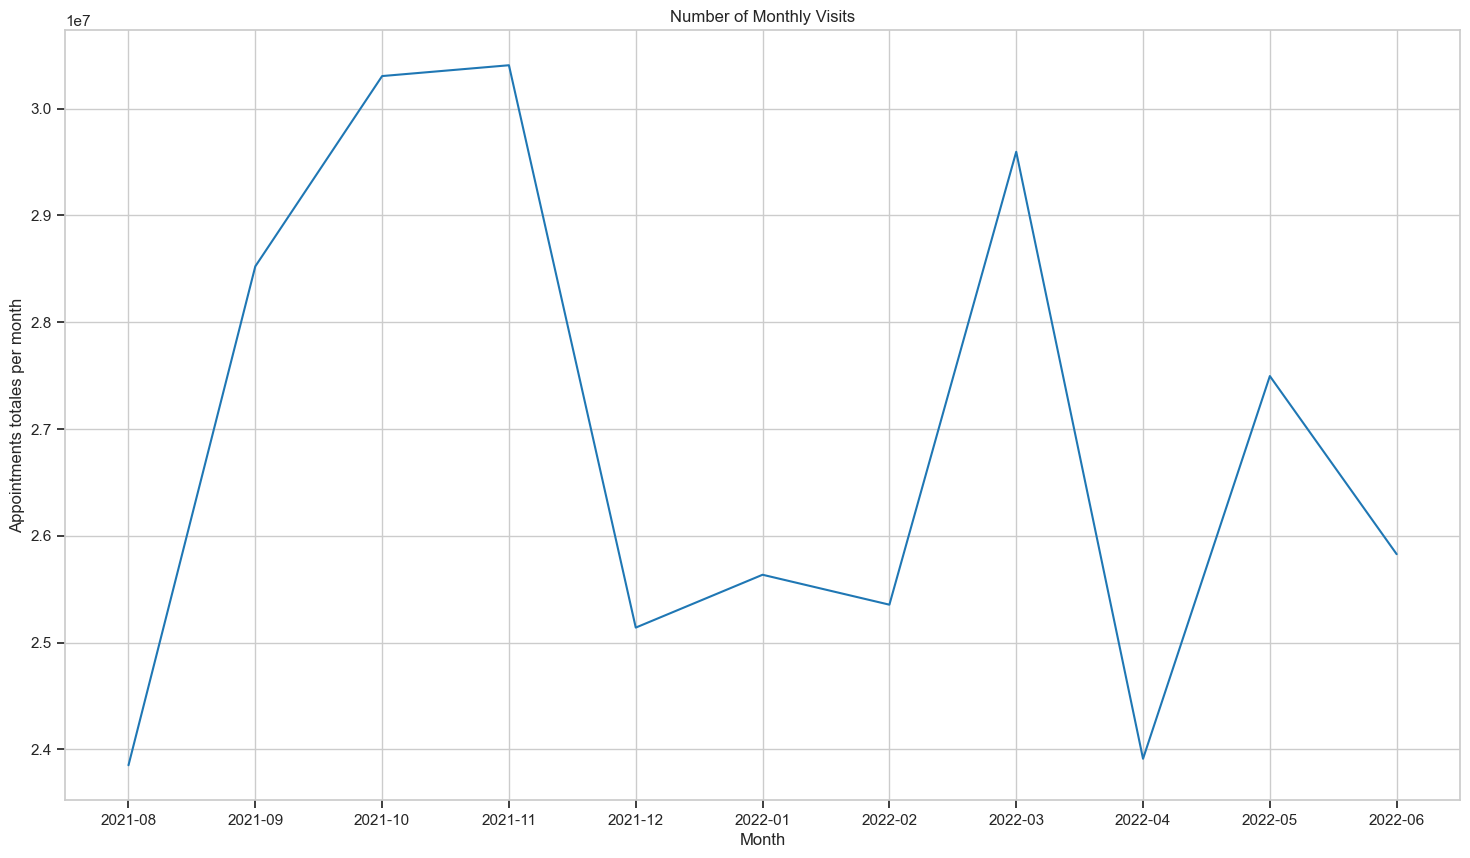

In [146]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month']=ar_df['appointment_month'].astype(str)
# Create a lineplot with Seaborn.
plt.figure(figsize=(18,10))
sns.lineplot(x='appointment_month',y='count_of_appointments',data=ar_df)
plt.title('Number of Monthly Visits')
plt.xlabel('Month')
plt.ylabel('Appointments totales per month')
plt.savefig('Number of Monthly Visits.png')



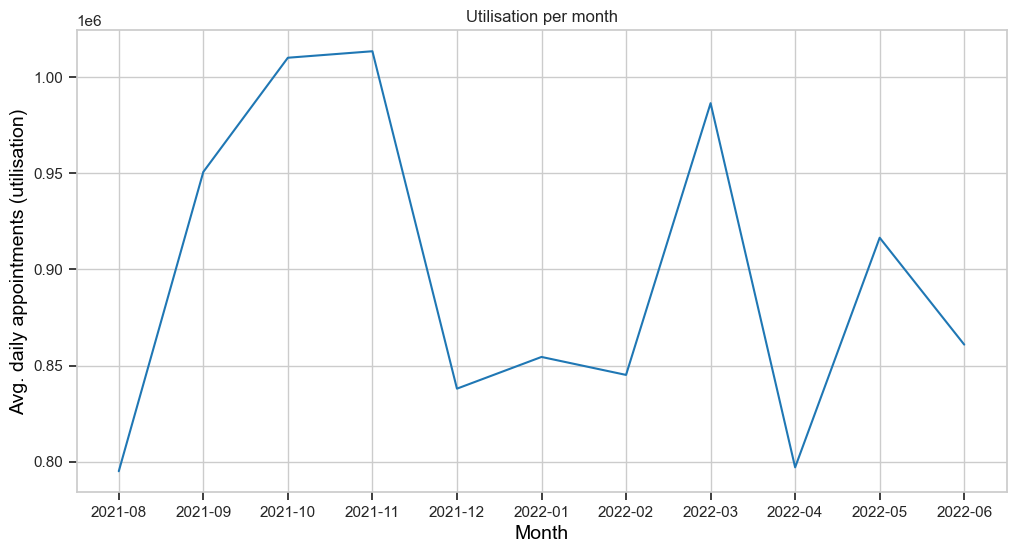

In [147]:
#Utilisation per month 
sns.lineplot(x='appointment_month',y='utilisation',data=ar_df)
plt.title('Utilisation per month')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Avg. daily appointments (utilisation)', fontsize=14, color='black')
plt.savefig('utilisation per month')



In [252]:
# Investigating Average Waiting Time During Peak and Low Demand Months

# Creating a dataset
utlization_month = ar[['appointment_month', 'time_between_book_and_appointment']].copy()

# Function to convert ranges and labels into average days
def convert_range_to_average(text):
    try:
        text = text.strip()
        if "to" in text:
            parts = text.split(" to ")
            low = int(parts[0])
            high = int(parts[1].split(" ")[0])
            return (low + high) / 2
        elif "Same Day" in text:
            return 0
        elif "More than 28 Days" in text:
            return 30
        elif "Day" in text:
            return int(text.split(" ")[0])
        else:
            return None
    except:
        return None

# Apply conversion
utlization_month['waiting_time_days'] = utlization_month['time_between_book_and_appointment'].apply(convert_range_to_average)

# Group by month and calculate mean waiting time
monthly_wait = utlization_month.groupby('appointment_month')['waiting_time_days'].mean().reset_index()
monthly_wait['waiting_time_days'] = monthly_wait['waiting_time_days'].round(1)
monthly_wait['waiting_time_days']=monthly_wait['waiting_time_days'].astype(str)


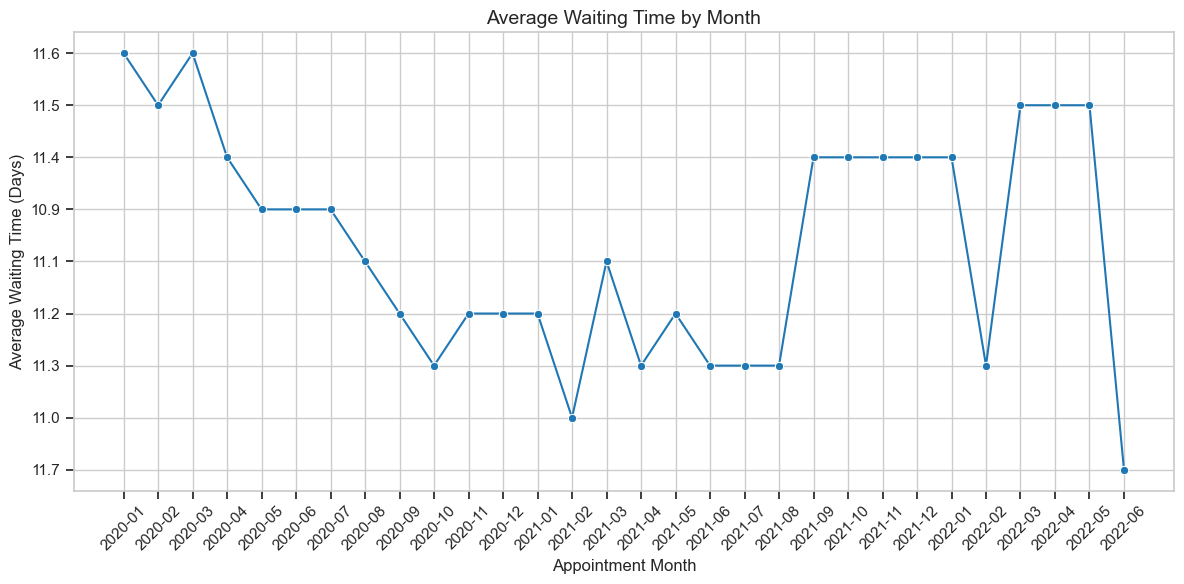

In [262]:
#Creating a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_wait, x='appointment_month', y='waiting_time_days', marker='o')

plt.title('Average Waiting Time by Month', fontsize=14)
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Average Waiting Time (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('utlization per month.png')
plt.show()

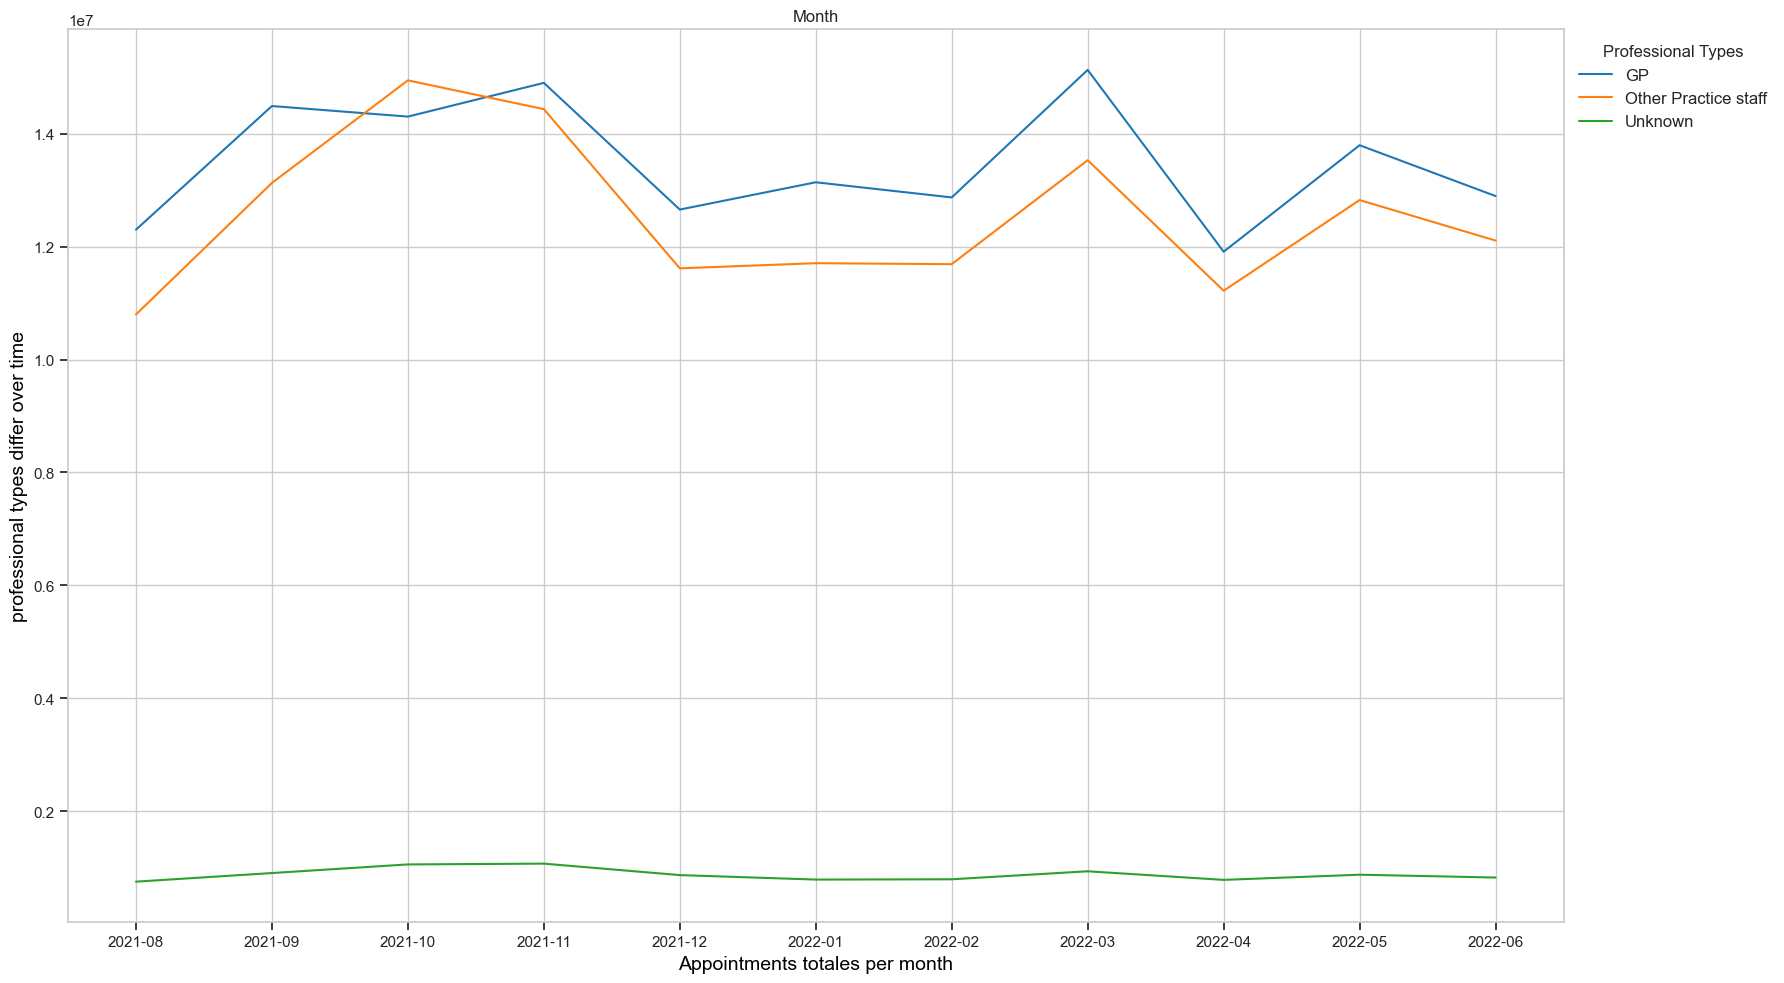

In [148]:
# Health Professional Types
professional_types = ar_agg.groupby(['hcp_type','appointment_month'])['count_of_appointments'].sum().reset_index().copy()
plt.figure(figsize=(18,10))
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='hcp_type',data=professional_types)
plt.title('Month')
plt.xlabel('Appointments totales per month',fontsize=14, color='black')
plt.ylabel('professional types differ over time',fontsize=14,color='black')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Professional Types', fontsize=12)
plt.tight_layout()
plt.savefig('fig.png')

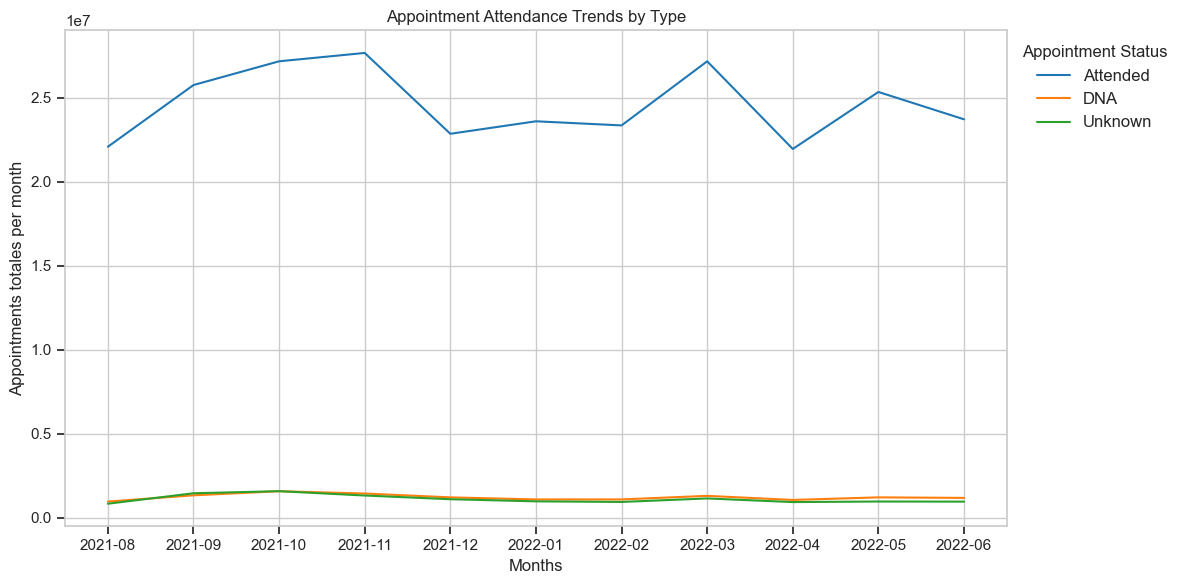

In [248]:
# Appointment Status Types
appointments_types=ar_agg.groupby(['appointment_status','appointment_month'])['count_of_appointments'].sum().reset_index().copy()
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='appointment_status',data=appointments_types)
plt.title('Appointment Attendance Trends by Type')
plt.xlabel('Months')
plt.ylabel('Appointments totales per month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Appointment Status', fontsize=12)
plt.tight_layout()
plt.savefig('fig1.png')

In [150]:
filter_status= ar_agg[ar_agg['appointment_status']=='Attended']
appointment_modes = (
    filter_status
    .groupby(['appointment_mode', 'appointment_month'])['count_of_appointments']
    .sum()
    .reset_index()
    .sort_values(by='count_of_appointments', ascending=False)
    .copy()
)
appointment_modes

,appointment_mode,appointment_month,count_of_appointments
2,Face-to-Face,2021-10,16989864
3,Face-to-Face,2021-11,16959008
7,Face-to-Face,2022-03,16546081
9,Face-to-Face,2022-05,16036543
10,Face-to-Face,2022-06,15164720
1,Face-to-Face,2021-09,15147988
6,Face-to-Face,2022-02,14066370
5,Face-to-Face,2022-01,13928856
4,Face-to-Face,2021-12,13603930
8,Face-to-Face,2022-04,13594930


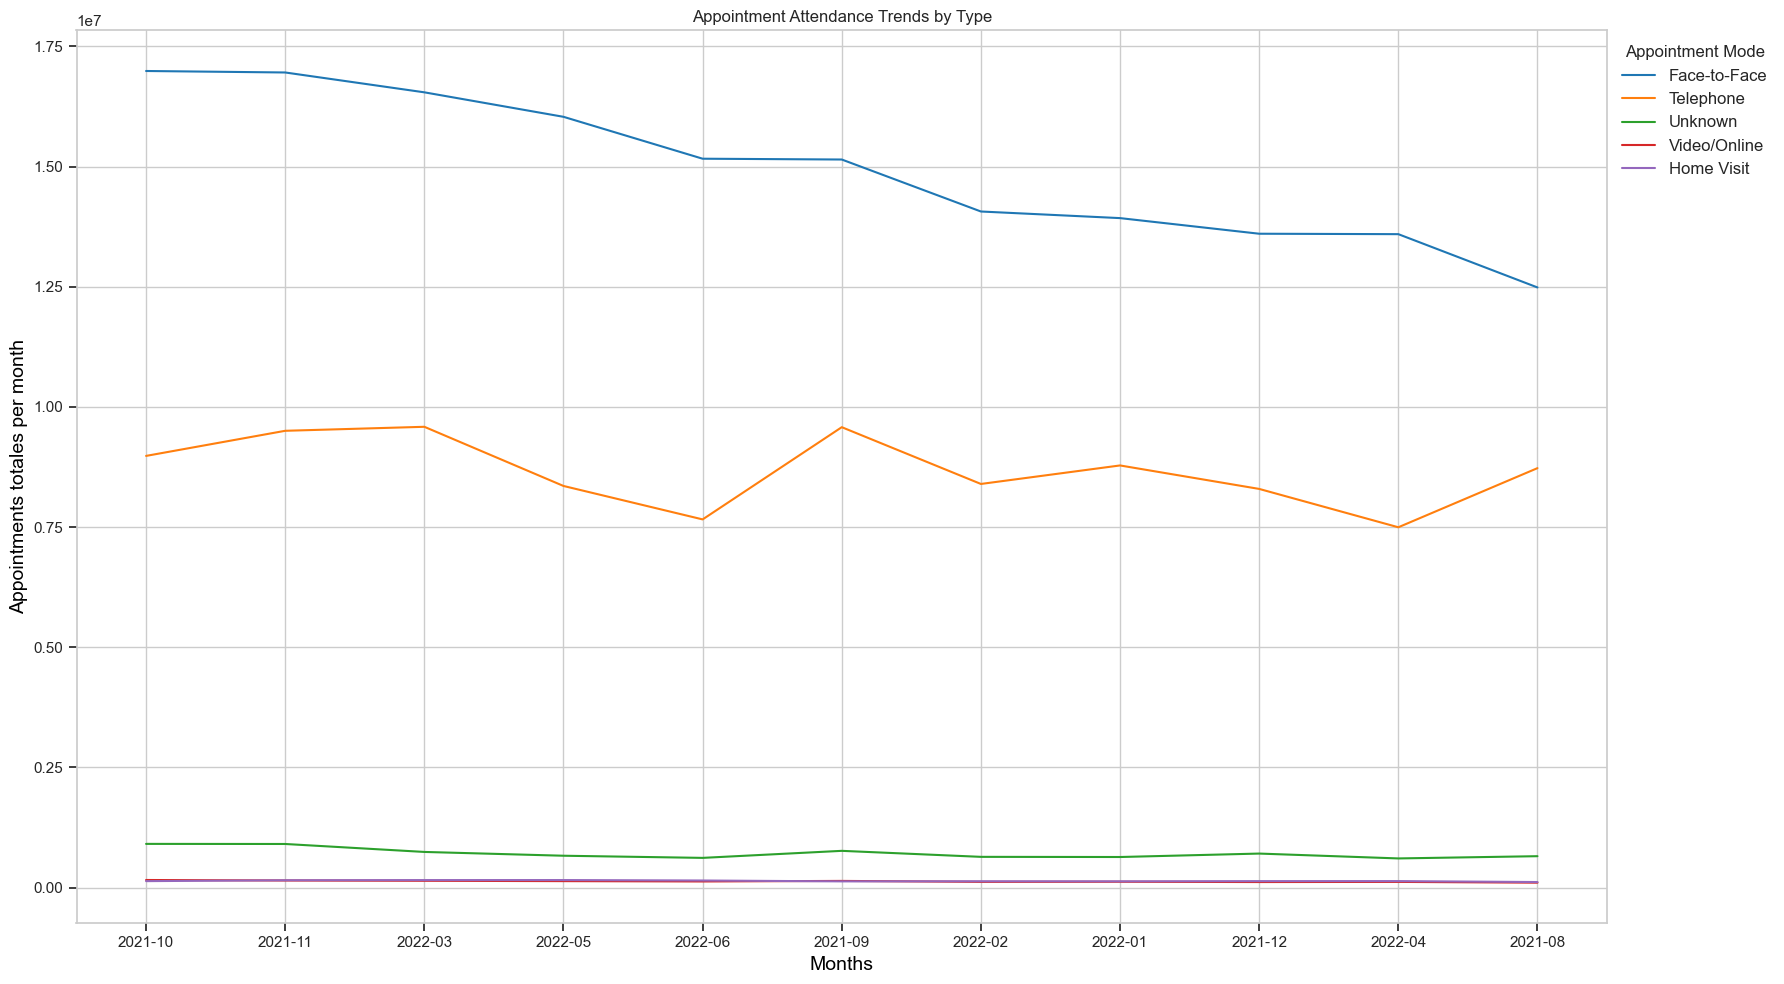

In [151]:
# Create a lineplot to answer the question.
#Are there changes in terms of appointment type and the busiest months?
plt.figure(figsize=(18,10))
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='appointment_mode',data=appointment_modes)
plt.title('Appointment Attendance Trends by Type')
plt.xlabel('Months', fontsize=14, color='black')
plt.ylabel('Appointments totales per month', fontsize=14, color='black')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Appointment Mode', fontsize=12)
plt.tight_layout()
plt.savefig('Appointment Attendance Trends by Type.png')


In [152]:
#Trends in time between booking an appointment
waitting_time=ar_agg.groupby(['appointment_month','time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index().copy()
waitting_time

,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2021-08,1 Day,2018319
1,2021-08,15 to 21 Days,1453209
2,2021-08,2 to 7 Days,4924960
3,2021-08,22 to 28 Days,828866
4,2021-08,8 to 14 Days,2889150
...,...,...,...
83,2022-06,22 to 28 Days,1217197
84,2022-06,8 to 14 Days,3250347
85,2022-06,More than 28 Days,1067420
86,2022-06,Same Day,11461923


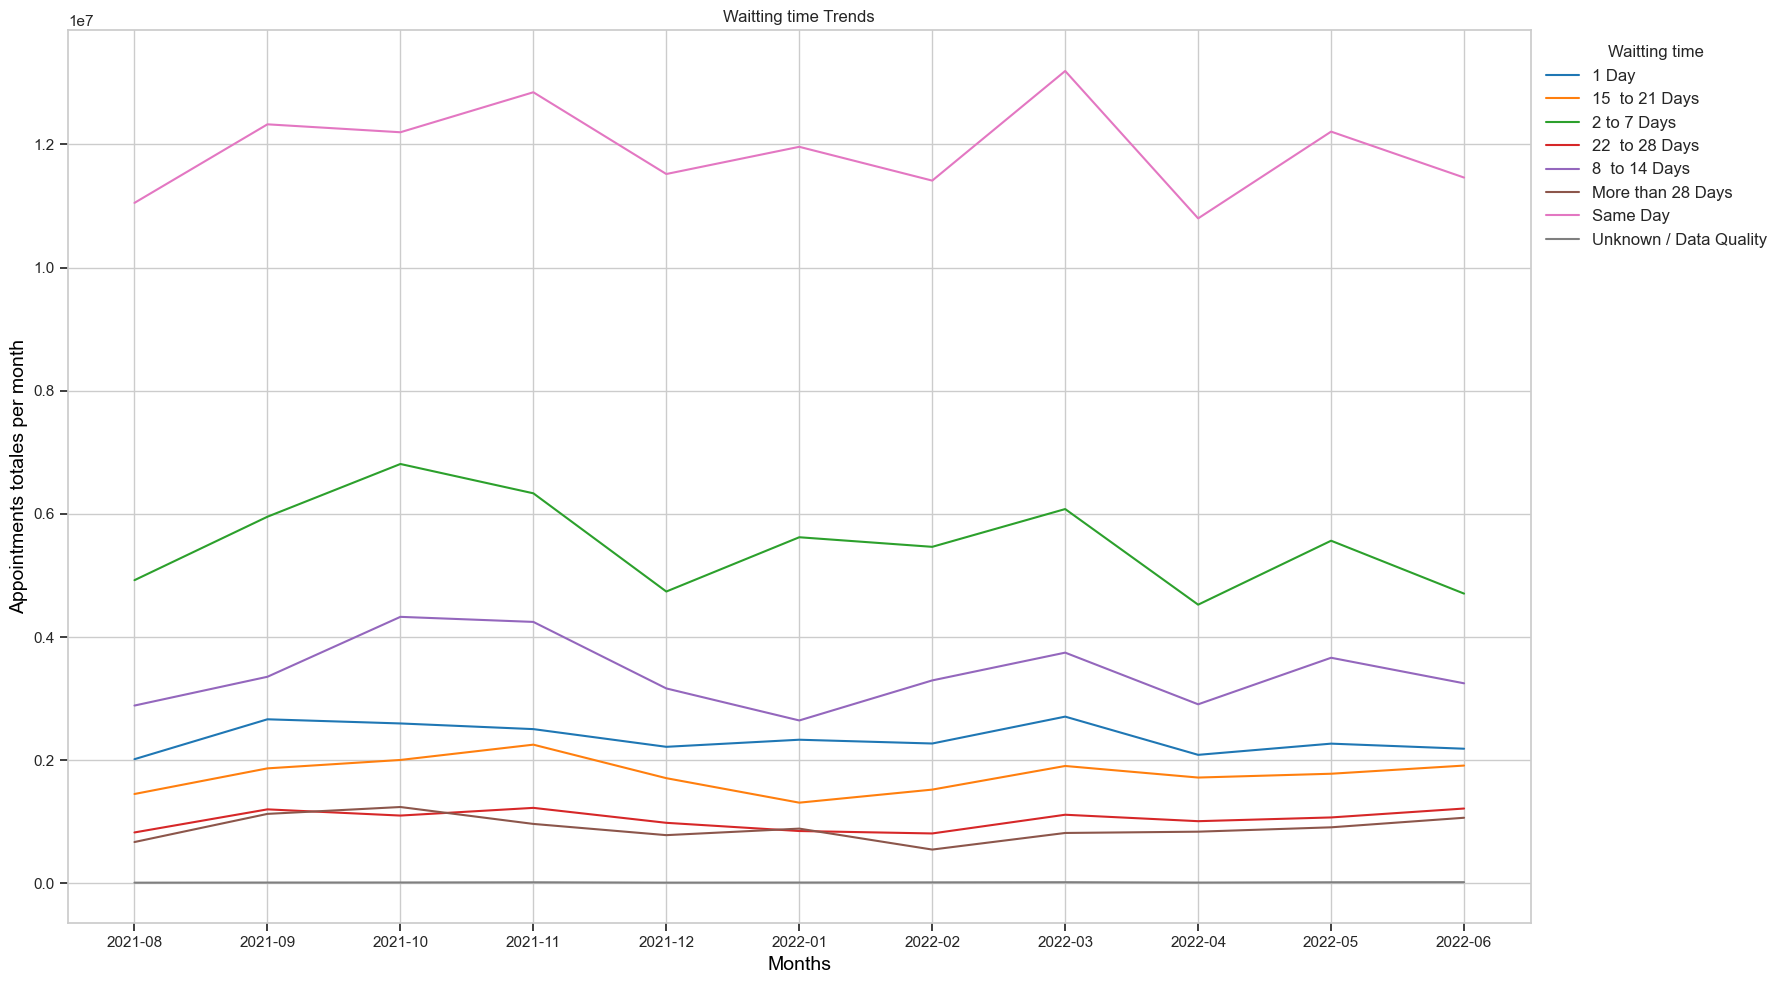

In [153]:
# Create a lineplot to answer the question.
plt.figure(figsize=(18,10))
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='time_between_book_and_appointment',data=waitting_time)
plt.title('Waitting time Trends')
plt.xlabel('Months', fontsize=14, color='black')
plt.ylabel('Appointments totales per month' ,fontsize=14, color='black')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Waitting time', fontsize=12)
plt.tight_layout()
plt.savefig('Waitting time Trends.png')

In [154]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
service_settings=nc.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().reset_index().copy()

# View the DataFrame.
service_settings

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


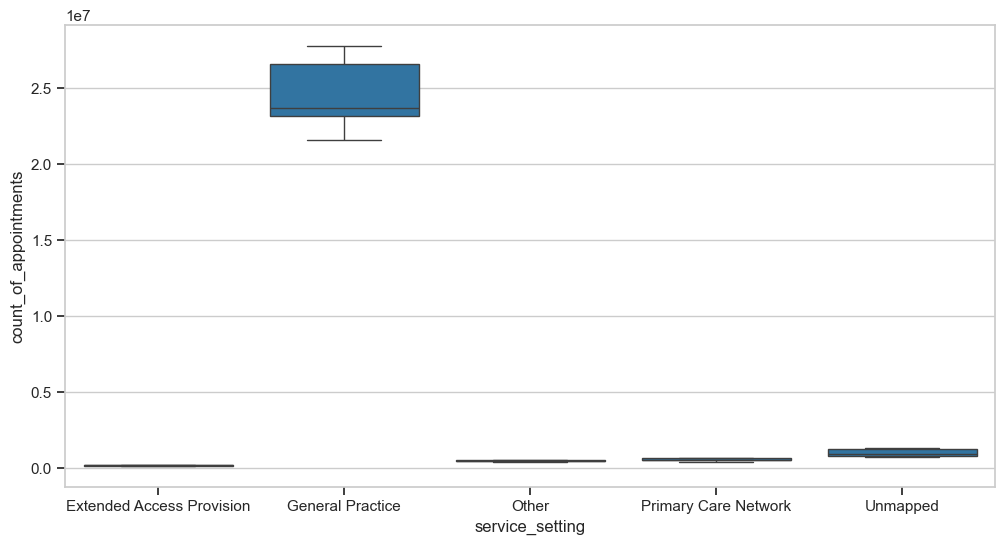

In [155]:
# Create a boxplot to investigate the spread of service settings.
sns.boxplot(data=service_settings, x='service_setting', y='count_of_appointments')
plt.savefig('service_setting.png')

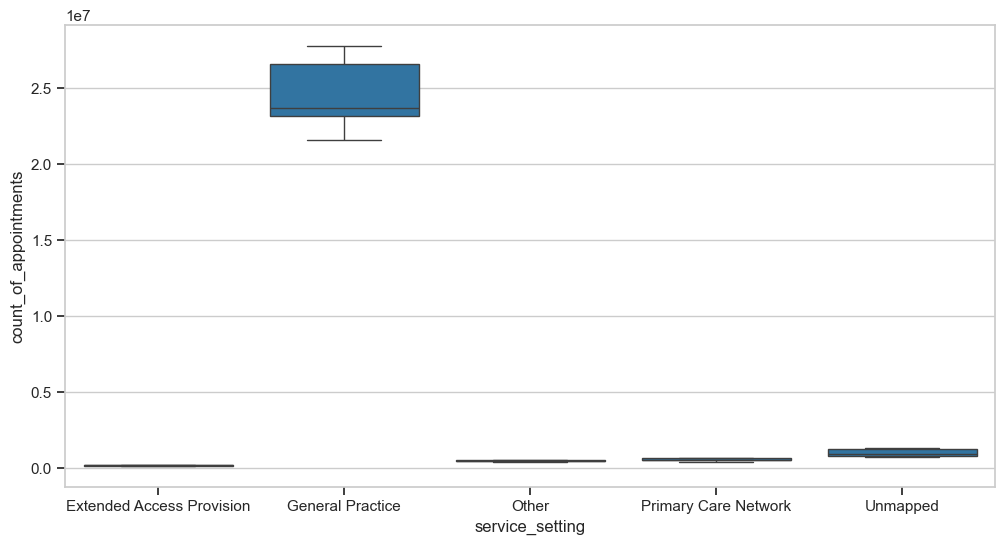

In [156]:
# Create a boxplot to investigate the service settings without GP.
filtered_settings = service_settings[service_settings['service_setting'] != 'General Practice']
# Create a boxplot to investigate the spread of service settings.
sns.boxplot(data=service_settings, x='service_setting', y='count_of_appointments')
plt.savefig('service_setting-NOGP.png')

In [263]:
# Forecasting the appointments for the General Practice
# Select date and service setting columns
app_date = nc[['appointment_date', 'service_setting']]

# Filter only for 'General Practice'
app_date = app_date[app_date['service_setting'] == 'General Practice']

# Convert to datetime format
app_date['appointment_date'] = pd.to_datetime(app_date['appointment_date'])

# Set datetime index (optional but useful for time series)
app_date.set_index('appointment_date', inplace=True)
gp_monthly = app_date.resample('M').size().reset_index(name='appointments')
#Rename columns for  Prophet model
gp_monthly.rename(columns={'appointment_date': 'ds', 'appointments': 'y'}, inplace=True)
#show the DateFrame
gp_monthly




,ds,y
0,2021-08-31,31381
1,2021-09-30,33477
2,2021-10-31,33327
3,2021-11-30,34248
4,2021-12-31,32217
5,2022-01-31,31646
6,2022-02-28,31224
7,2022-03-31,35855
8,2022-04-30,30645
9,2022-05-31,33379


In [264]:
model = Prophet()
model.fit(gp_monthly)
future = model.make_future_dataframe(periods=6, freq='m')
forecast=model.predict(future)

13:11:16 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing


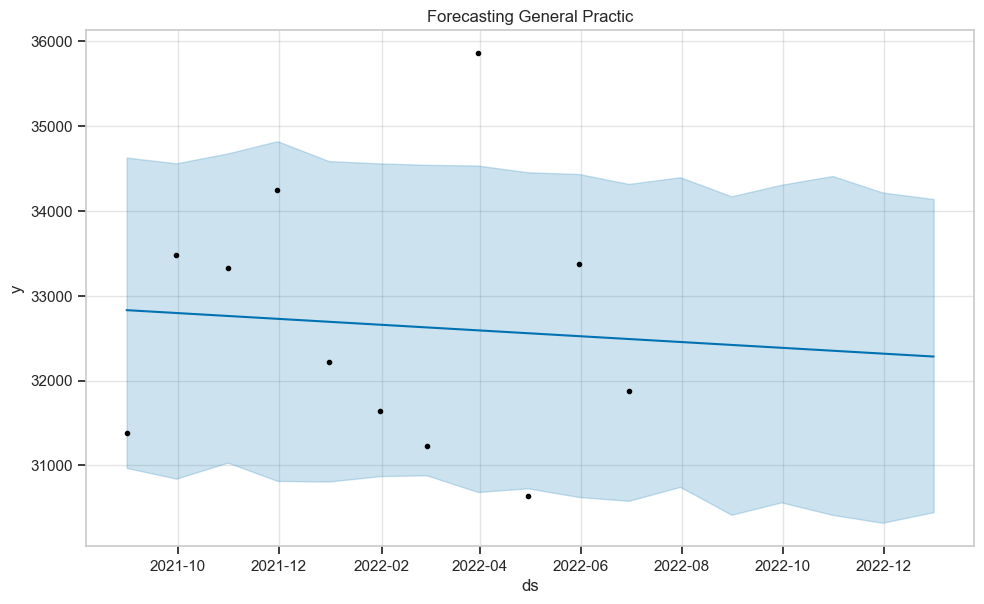

In [159]:
fig=model.plot(forecast)
ax = fig.gca()
ax.set_title('Forecasting General Practic')
fig.savefig('model1')

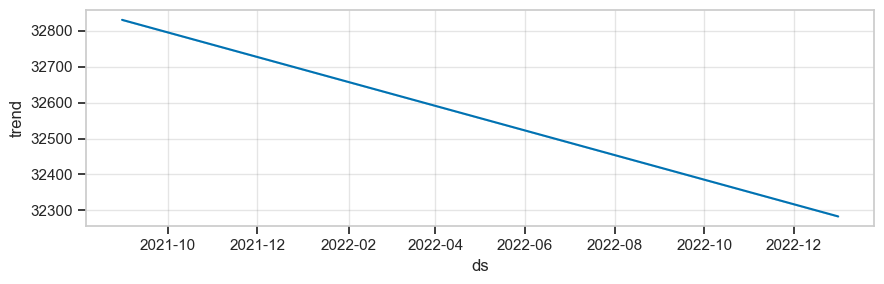

In [265]:
components=model.plot_components(forecast)
components. savefig('componets.png')

In [161]:
# Step 1: Filter and convert dates
app_cat = nc[['national_category', 'appointment_date']].copy()
app_cat['appointment_date'] = pd.to_datetime(app_cat['appointment_date'])

# Step 2: Create 'month' column
app_cat['month'] = app_cat['appointment_date'].dt.to_period('M').dt.to_timestamp()

# Step 3: Group by month and category
app_grp = app_cat.groupby(['month', 'national_category']).size().reset_index(name='appointments')

# Step 4: Preview
app_grp.head()
#filter only Social Prescribing Service 
social_df = app_grp[app_grp['national_category'] == 'Social Prescribing Service'].copy()
social_df.rename(columns={'month': 'ds', 'appointments': 'y'}, inplace=True)
social_df


,ds,national_category,y
13,2021-08-01,Social Prescribing Service,2125
31,2021-09-01,Social Prescribing Service,2303
49,2021-10-01,Social Prescribing Service,2237
67,2021-11-01,Social Prescribing Service,2436
85,2021-12-01,Social Prescribing Service,2165
103,2022-01-01,Social Prescribing Service,2320
121,2022-02-01,Social Prescribing Service,2405
139,2022-03-01,Social Prescribing Service,2807
157,2022-04-01,Social Prescribing Service,2340
175,2022-05-01,Social Prescribing Service,2690


In [266]:
model01 = Prophet()
model01.fit(social_df)
future_01 = model01.make_future_dataframe(periods=6, freq='m')
forecast01=model.predict(future_01)

13:11:31 - cmdstanpy - INFO - Chain [1] start processing
13:11:32 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x1000 with 0 Axes>

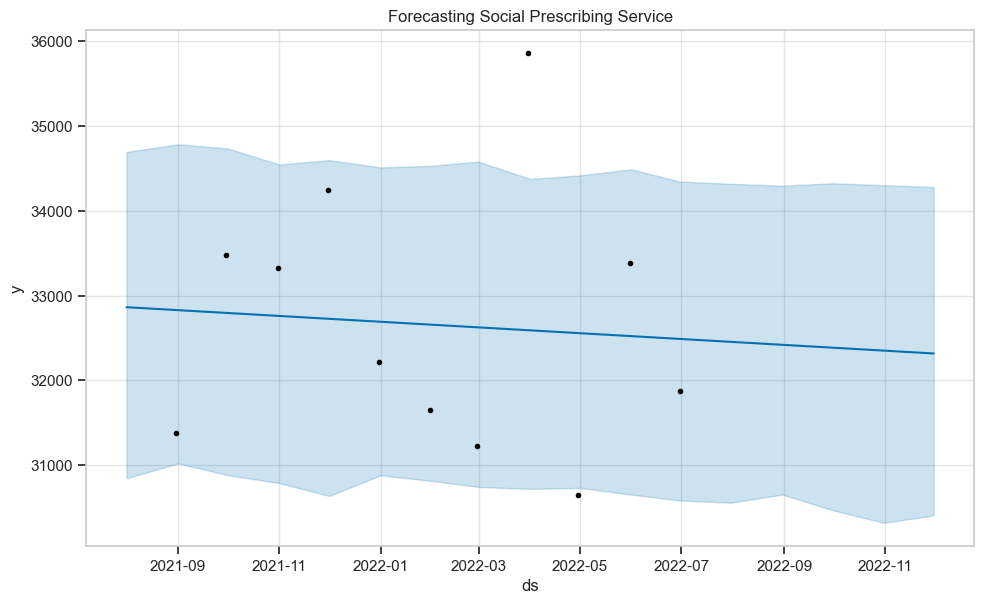

In [163]:
plt.figure(figsize=(12, 10))
fig=model.plot(forecast01)
ax = fig.gca()
ax.set_title('Forecasting Social Prescribing Service')
fig.savefig('social_df')


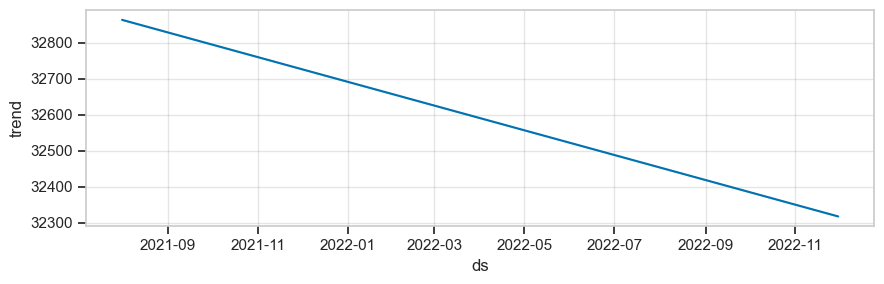

In [267]:
component_SC=model01.plot_components(forecast01)
component_SC.savefig('component_SC.png')

In [165]:
 #Why those chart types?
A line chart with a confidence interval is ideal for visualizing time-series forecasts. It helps communicate both expected trends and the uncertainty over time.
📊 What the chart shows
The forecast reveals a gradual decline in GP appointment volumes, while Social Prescribing Services show a slight upward trend. The shaded bands represent the model’s confidence intervals.

🎯 Who is this for?
This insight supports NHS planners, resource managers, and care delivery leaders who need to anticipate demand across care types.

💡 Business impact
Understanding these trends enables the NHS to realign staffing and funding, reducing pressure on GP services and scaling up community-based care through Social Prescribing.

SyntaxError: invalid character '📊' (U+1F4CA) (2120472258.py, line 3)

### 🧑‍⚕️ Workforce Consideration

- General Practice appointments remain consistently high, and non-attendance rates (DNA + Unknown) exceed 10% in several key ICBs.
- These factors suggest potential strain on service delivery and may justify NHS consideration of targeted workforce increases, particularly in high-demand or low-attendance regions.


This module explored monthly trends in appointment modes, service settings, waiting times, and professional types. Face-to-face appointments remain the dominant mode, with General Practice consistently reporting the highest volumes. Seasonal peaks were noted in autumn and spring. Non-attendance (DNA and Unknown) exceeds 10% in several regions, warranting further investigation.

Forecasting with Prophet revealed a slight decline in total monthly GP appointments, whereas Social Prescribing Services showed a steady upward trend. These patterns align with NHS goals to reduce reliance on traditional GP visits and expand access to community-based care models.

Utilization trends also show fluctuations in daily capacity. While most patients are seen within a week, delays exceeding two weeks persist and must be addressed to improve equity and efficiency.

**Key Insights for Decision-Makers:**
- Align staffing and funding models to support the shift from GP services to Social Prescribing.
- Prioritize regions with high non-attendance and long delays for targeted service interventions.


In [ ]:
## 📌 Conclusion and Recommendations

This analysis provided a comprehensive view of NHS appointment patterns using real scheduling and attendance data. We found:

- General Practice consistently holds the highest volume of appointments across all service settings.
- Seasonal demand peaks in autumn and spring, with dips in April and May.
- Non-attendance (DNA + Unknown) exceeds 10% in several high-volume regions, notably Greater Manchester and Black Country ICBs.
- The average wait time is 5.3 days, though some patients face delays over 2 weeks.
- Social Prescribing Services, while lower in volume, show a slight upward trend and align with NHS goals of expanding community-based care.

### 🔄 Recommendations
- Investigate and address high non-attendance rates in specific ICBs through patient engagement or reminder systems.
- Expand Social Prescribing Services and Home Visit options where feasible to reduce pressure on GP appointments.
- Continue monitoring regional trends in wait time and mode of consultation to inform future service planning.

This project supports NHS strategic priorities by identifying pressure points, forecasting demand, and recommending actions to improve service delivery.




- 
